###### The cell below loads the visual style of the notebook when run.

In [3]:
from IPython.core.display import HTML
css_file = '../../styles/styles.css'
HTML(open(css_file, "r").read())

# Plotting data with matplotlib

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span>Learning Objectives</h2>
</div>
</section>

> * How to plot basic x, y data in Python
> * How to display images
> * How to label axes
> * Save plots to many formats, including PNG and PDF
> * More complex plots: histograms, 3D plotting, subplots
> * String formatting

The key to understanding data is to visualise it. The clear presentation of your data is one of the most important tasks for scientists. On a personal level, the horrible plotting options in Excel is one of the reasons a little part of me dies every time a student does their data analysis in a spreadsheet.

There are many Python plotting libraries for display of data but [Matplotlib](http://matplotlib.org/) is the de-facto standard. In this session we'll learn how to display our data using matplotlib. 

Matplotlib is imported like so:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 

If you are using a Python shell, or writing a Python program file (.py), you only need the line that says ```import matplotlib.pyplot as plt```. 

However, if you are running in the Jupyter notebook, and want your plots to display inside the notebook you also need to run the ```%matplotlib inline``` command. This needs to be run **before** importing matplotlib.

## Basic X-Y plots

To get started, let's generate some fake data using numpy - here I'm plotting $y = \sin x$ between 0 and $4\pi$.

In [5]:
import numpy as np
x = np.linspace(0.0, 4.0*np.pi, 100) #evenly spaced grid of 100 points
y = np.sin(x)

The matplotlib command [plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) is used to plot simple x-y data. Let's read the help for this function. 

In [6]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

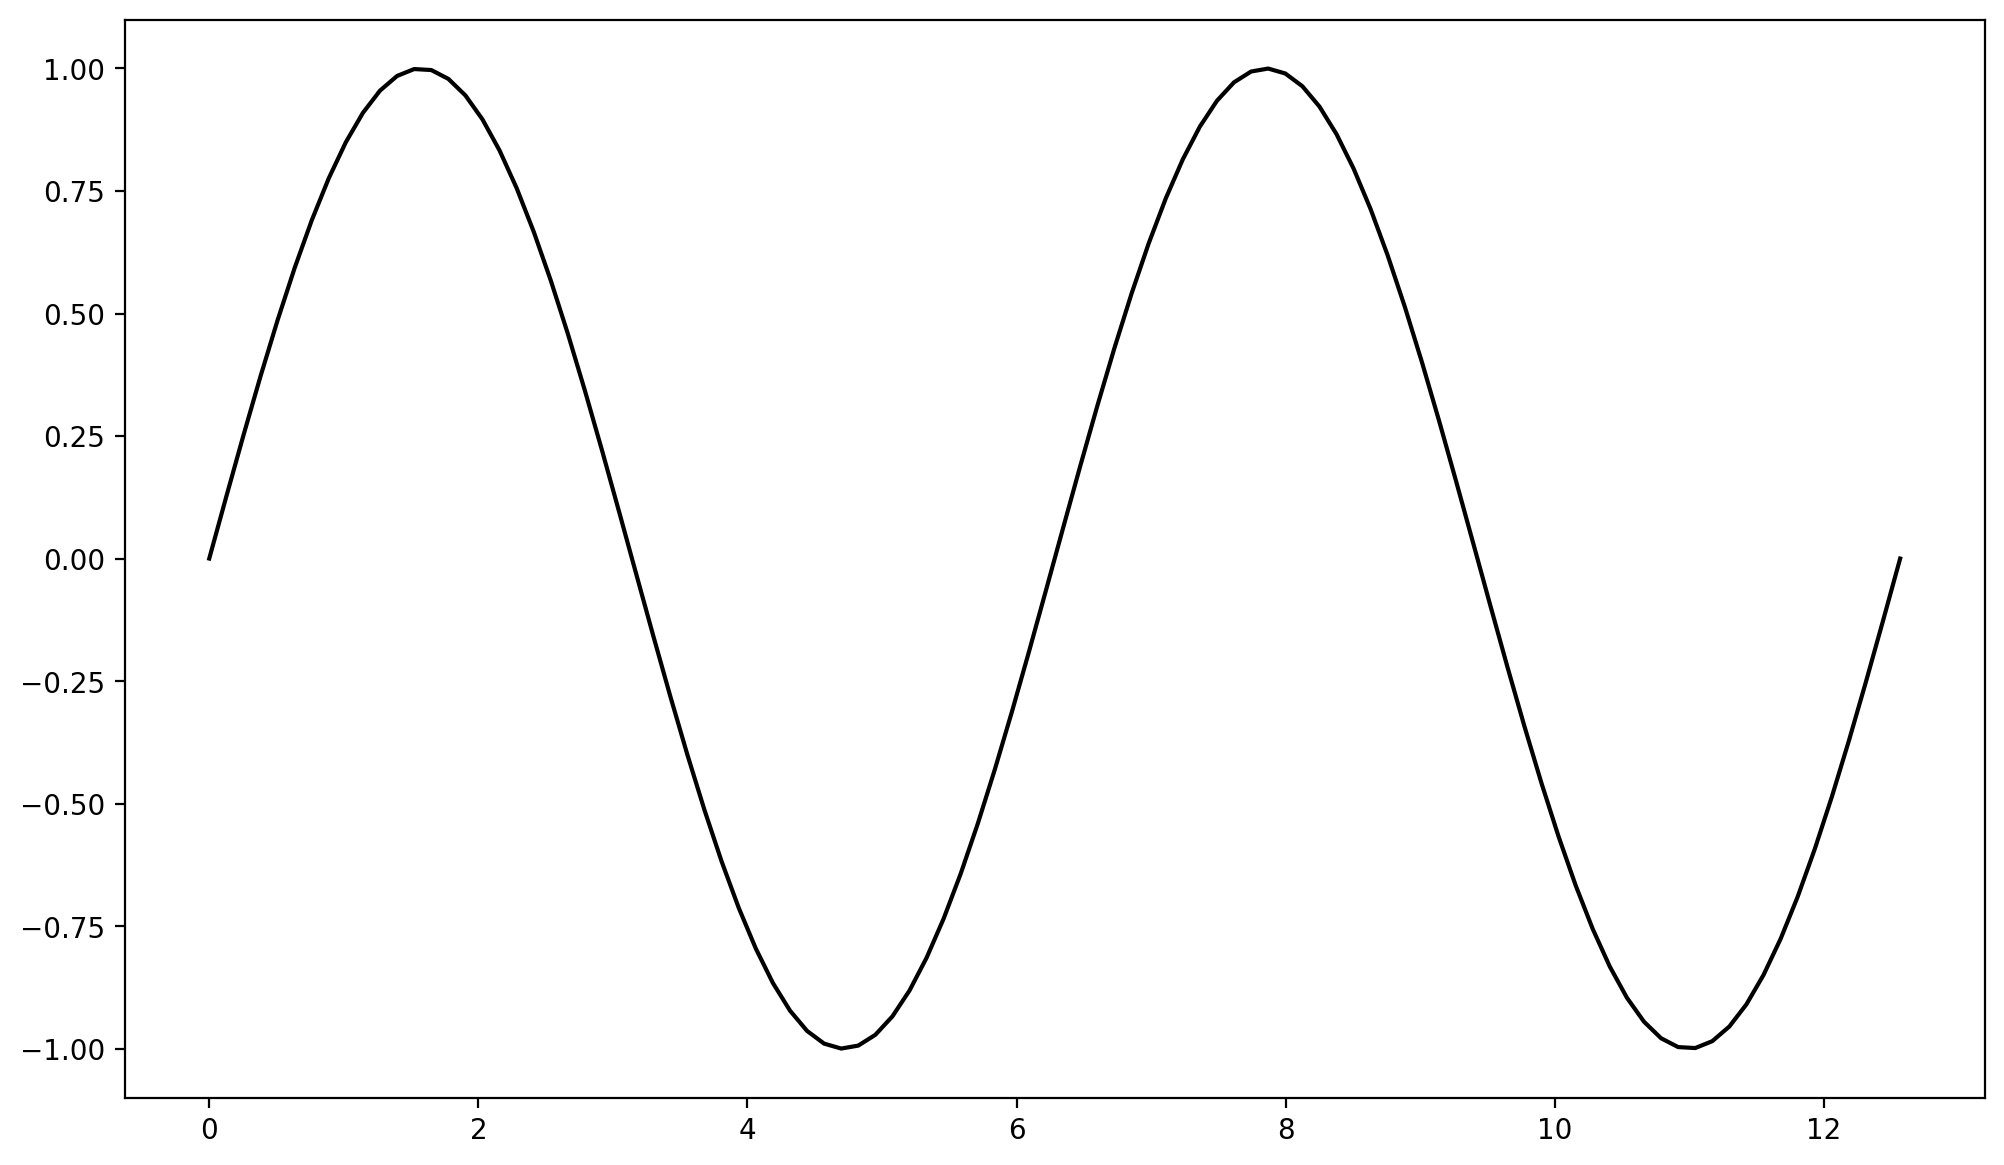

In [6]:
plt.plot(x, y, 'k-')
plt.show()

Notice how we used ```plt.show()``` to display the figure we'd created. 

I hope we can agree that the plot above is crap. As a bare minimum it needs x-y axis labels. I also feel like a more colorful line:

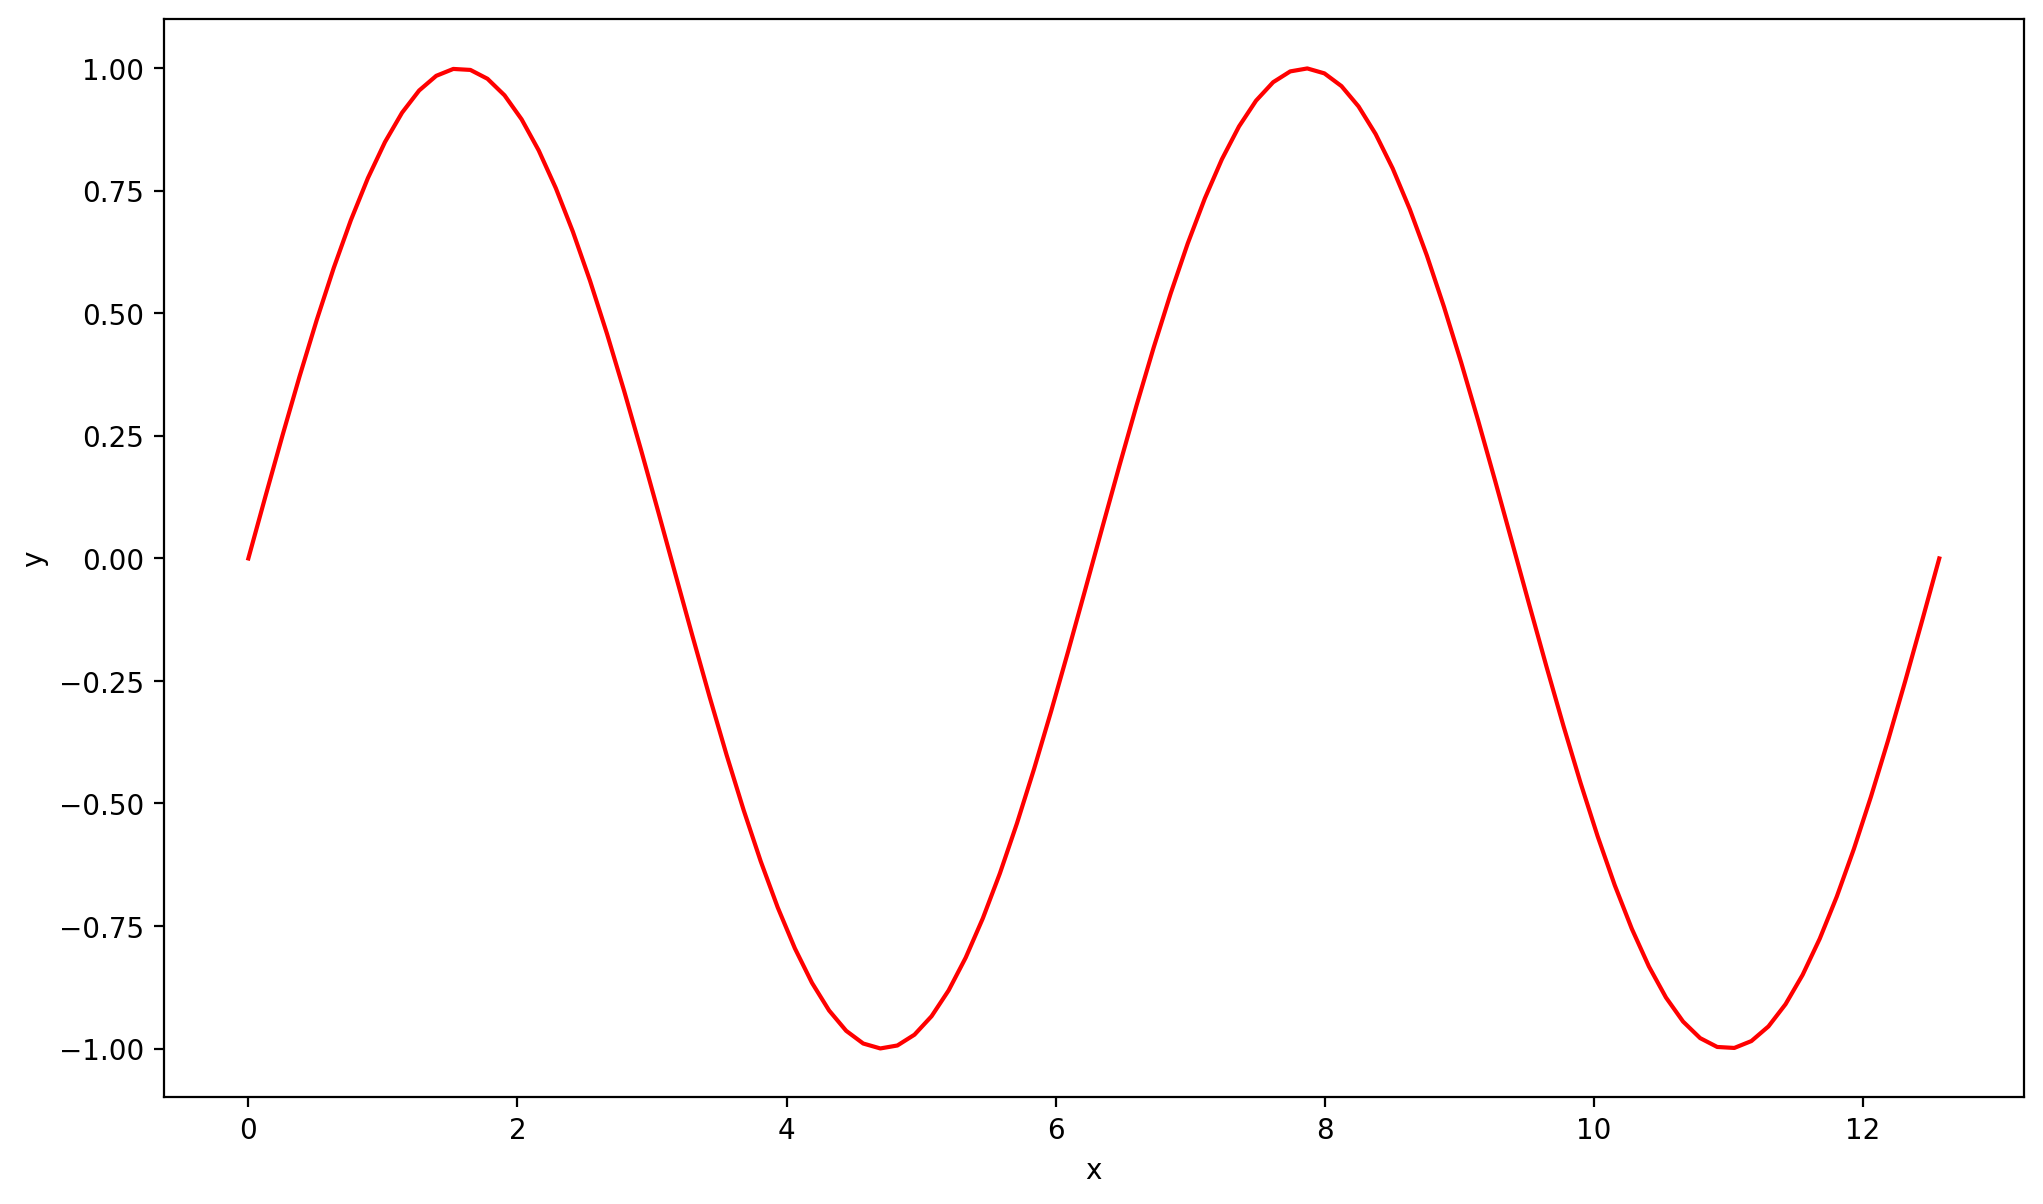

In [7]:
plt.plot(x, y, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## More control - figures and axes

When we called the ```plt.plot``` function, it created a figure and a set of axes for us automatically. Quite often in matplotlib, we want to create figure and axis *objects* by hand, and use the axis object to do the plotting. The real advantage of this approach becomes obvious when a figure contains more than one subplot.

The ```plt.subplots``` function will create a figure and axis object for us:

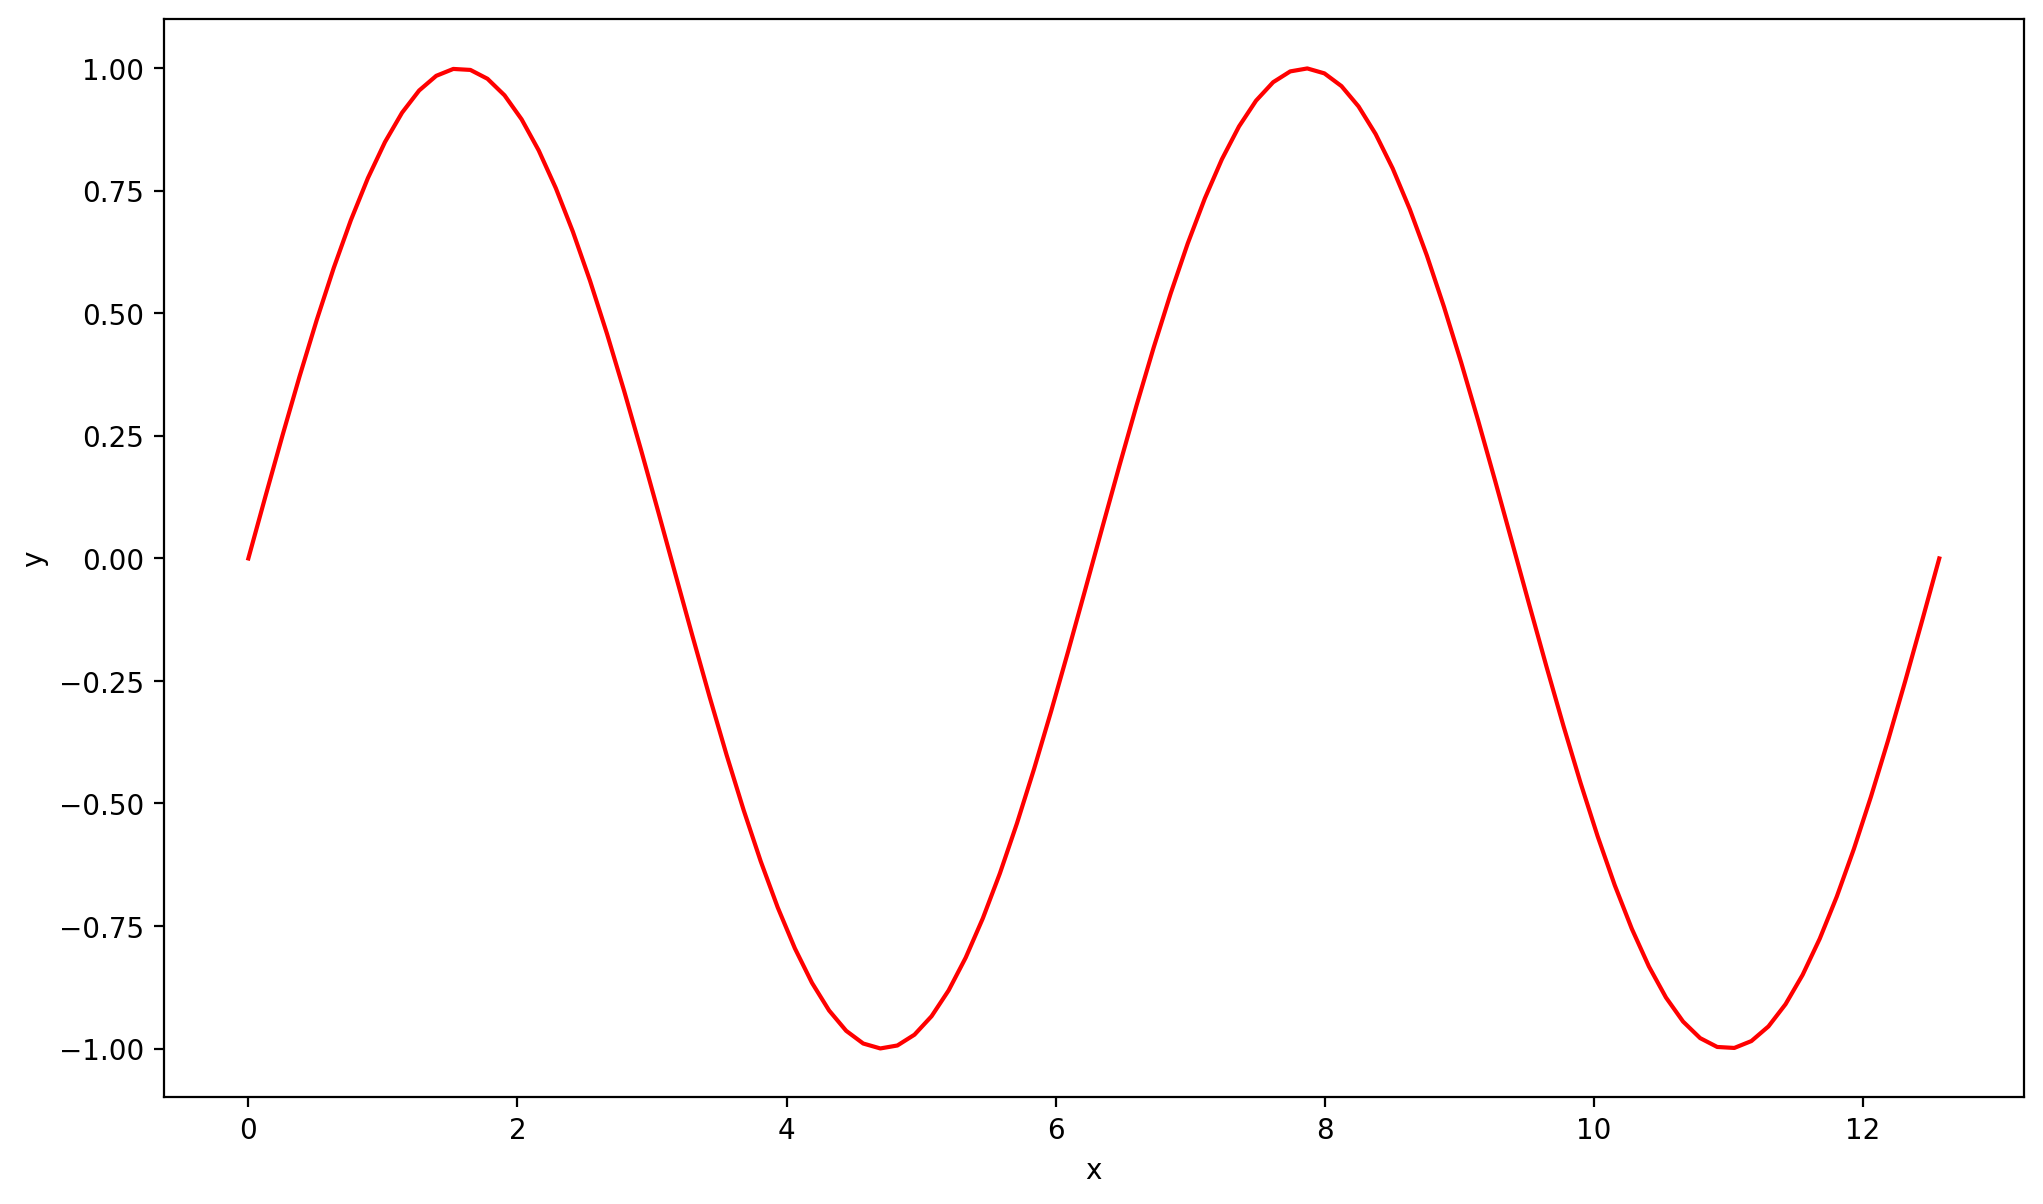

In [8]:
import matplotlib.pyplot as plt
# create figure and axes objects
fig, axes = plt.subplots()
#fig, axes = plt.subplots(1,2)
# use axes for plotting

#axis1 = axes[0]
#axis2 = axes[1]

#axis1.plot(x,y,'b:')

#axis2.plot(x, y, 'r-')
#axis2.set_ylabel('y') # notice the slightly different style for labels
#axis2.set_xlabel('x')

axes.plot(x, y, 'r-')
axes.set_ylabel('y') # notice the slightly different style for labels
axes.set_xlabel('x')

plt.show()

## Subplots

Although a little more code is involved, one advantage is that it is easy to add multiple subplots - just provide the ```plt.subplots``` function with the number of rows and columns:

Plotting on subplot: i= 0  j= 0
Plotting on subplot: i= 0  j= 1
Plotting on subplot: i= 1  j= 0
Plotting on subplot: i= 1  j= 1


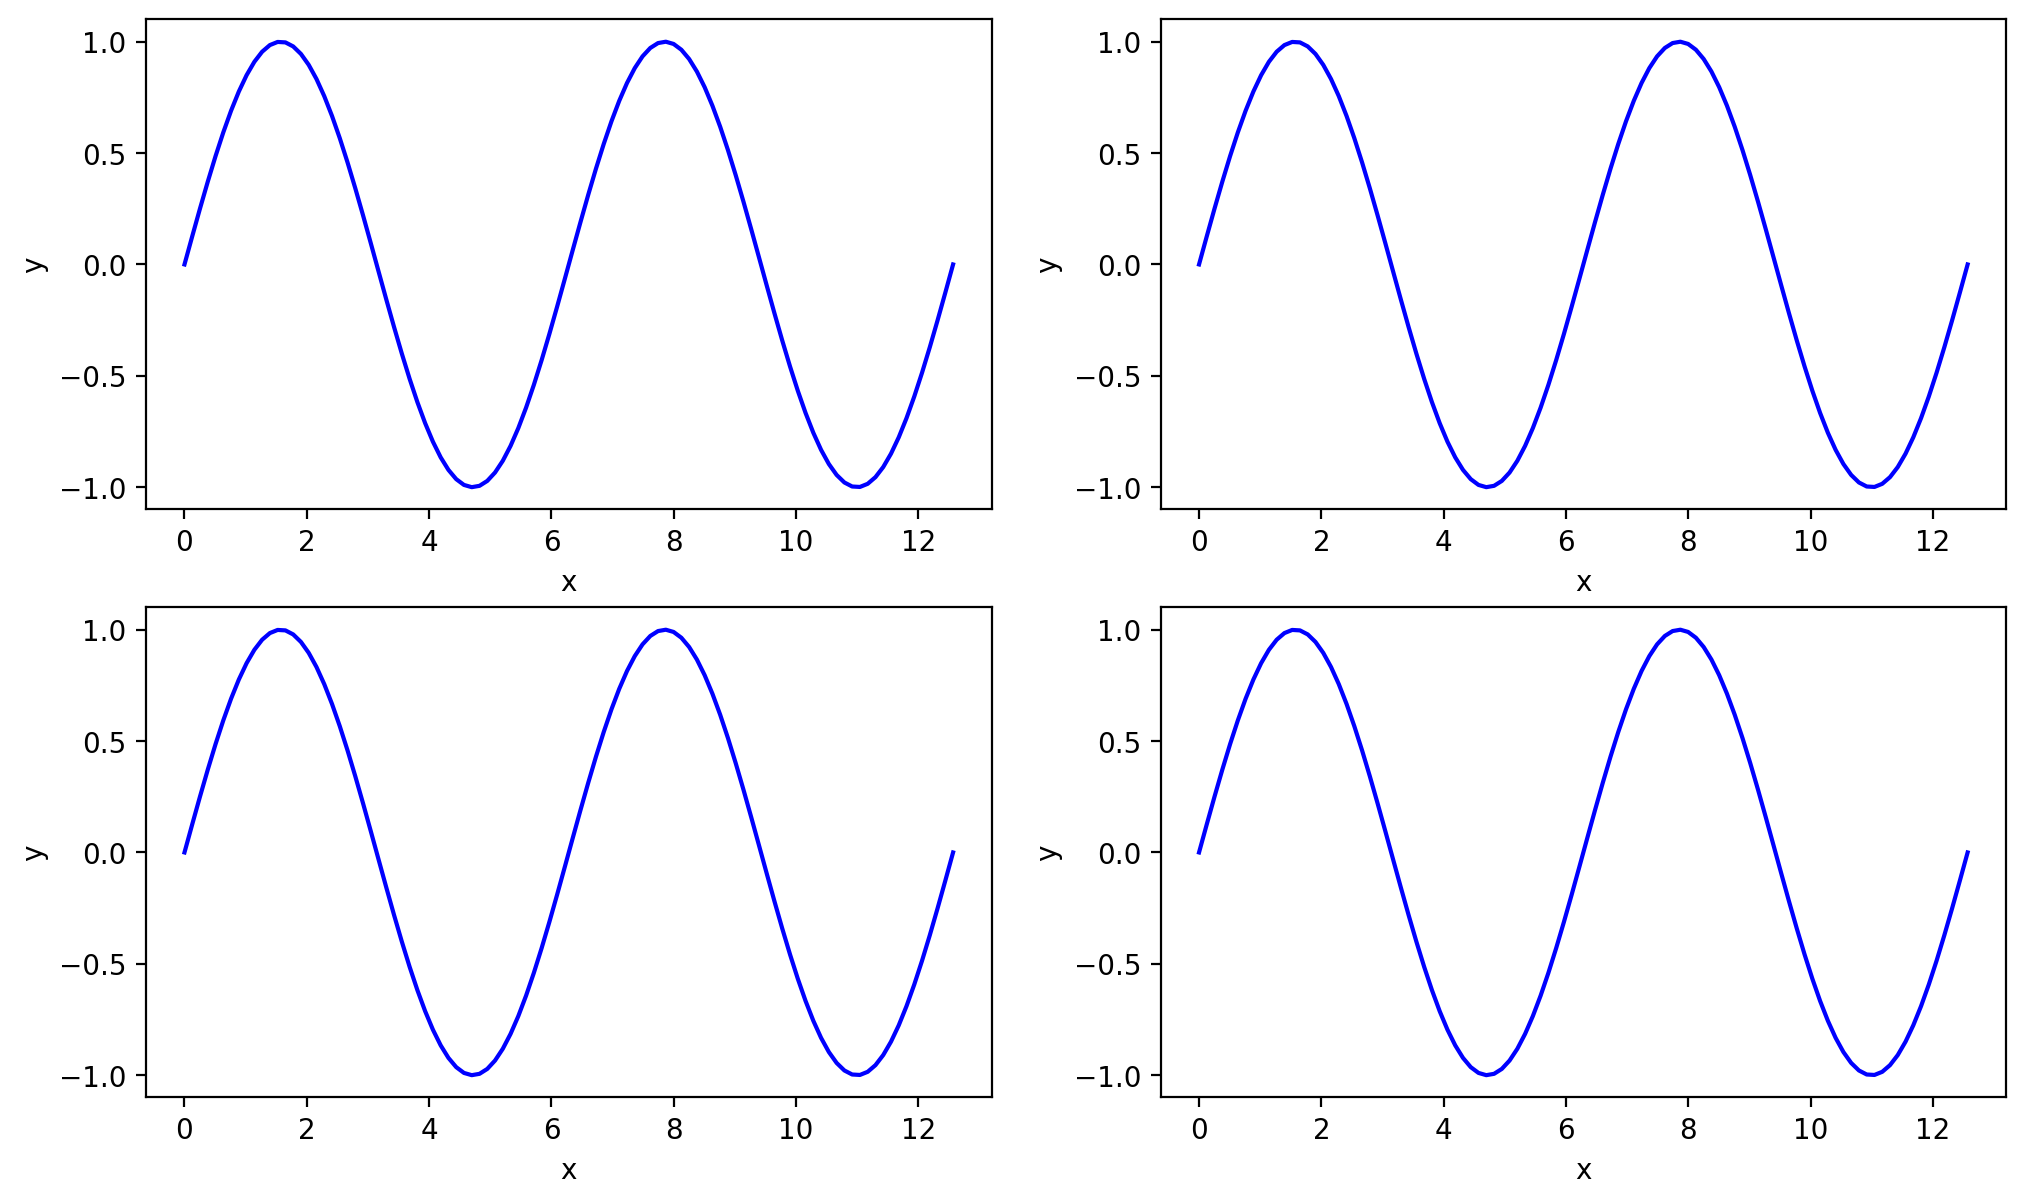

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# axes is a 2x2 list of axis objects

for i in range(2):
    for j in range(2):
        print("Plotting on subplot: i=", i, " j=", j)
        axis = axes[i, j]

        axis.plot(x, y, 'b-')
        axis.set_xlabel('x')
        axis.set_ylabel('y')

plt.show()

This is nice, but the overlapping labels are an issue. The ```fig``` object has a function called ```tight_layout``` that will fix that for us: 

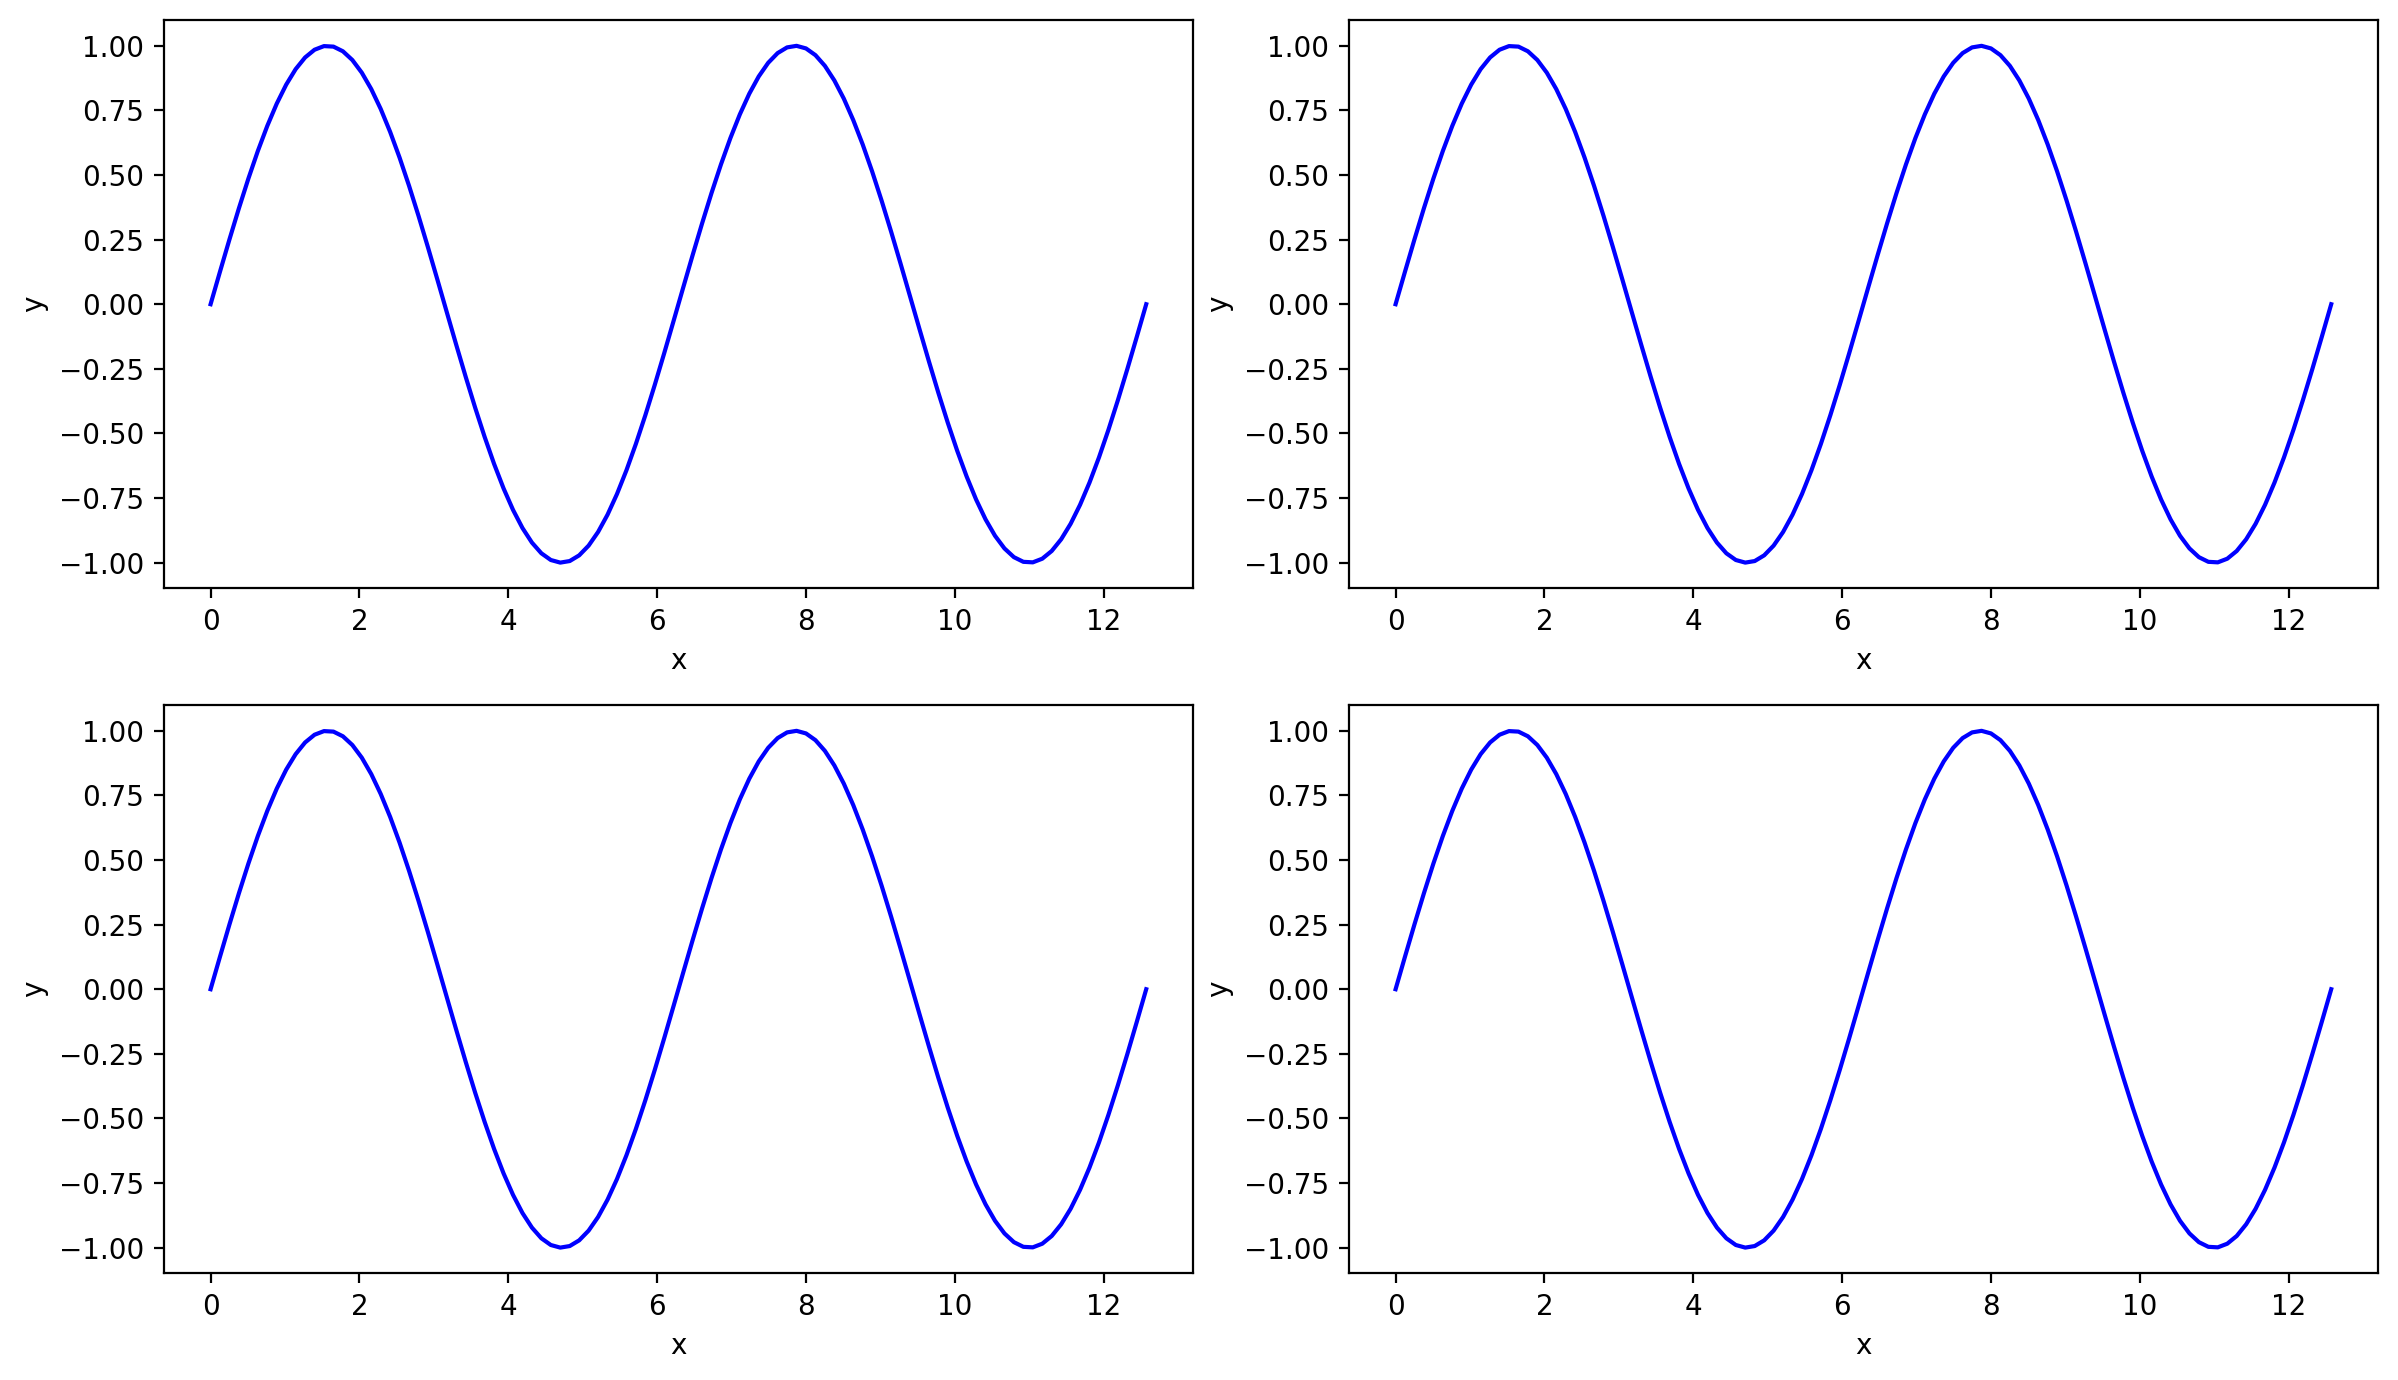

In [11]:
fig, axes = plt.subplots(nrows=2,ncols=2)

for i in range(2):
    for j in range(2):
        axis = axes[i, j]

        axis.plot(x, y, 'b-')
        axis.set_xlabel('x')
        axis.set_ylabel('y')

fig.tight_layout()
plt.show()

## Multiple lines and legends

What if I want to plot several lines on the same figure? You can just make multiple calls to the ```plot``` function. The ```plot``` function also has an optional ```label``` argument that helps us label each line:

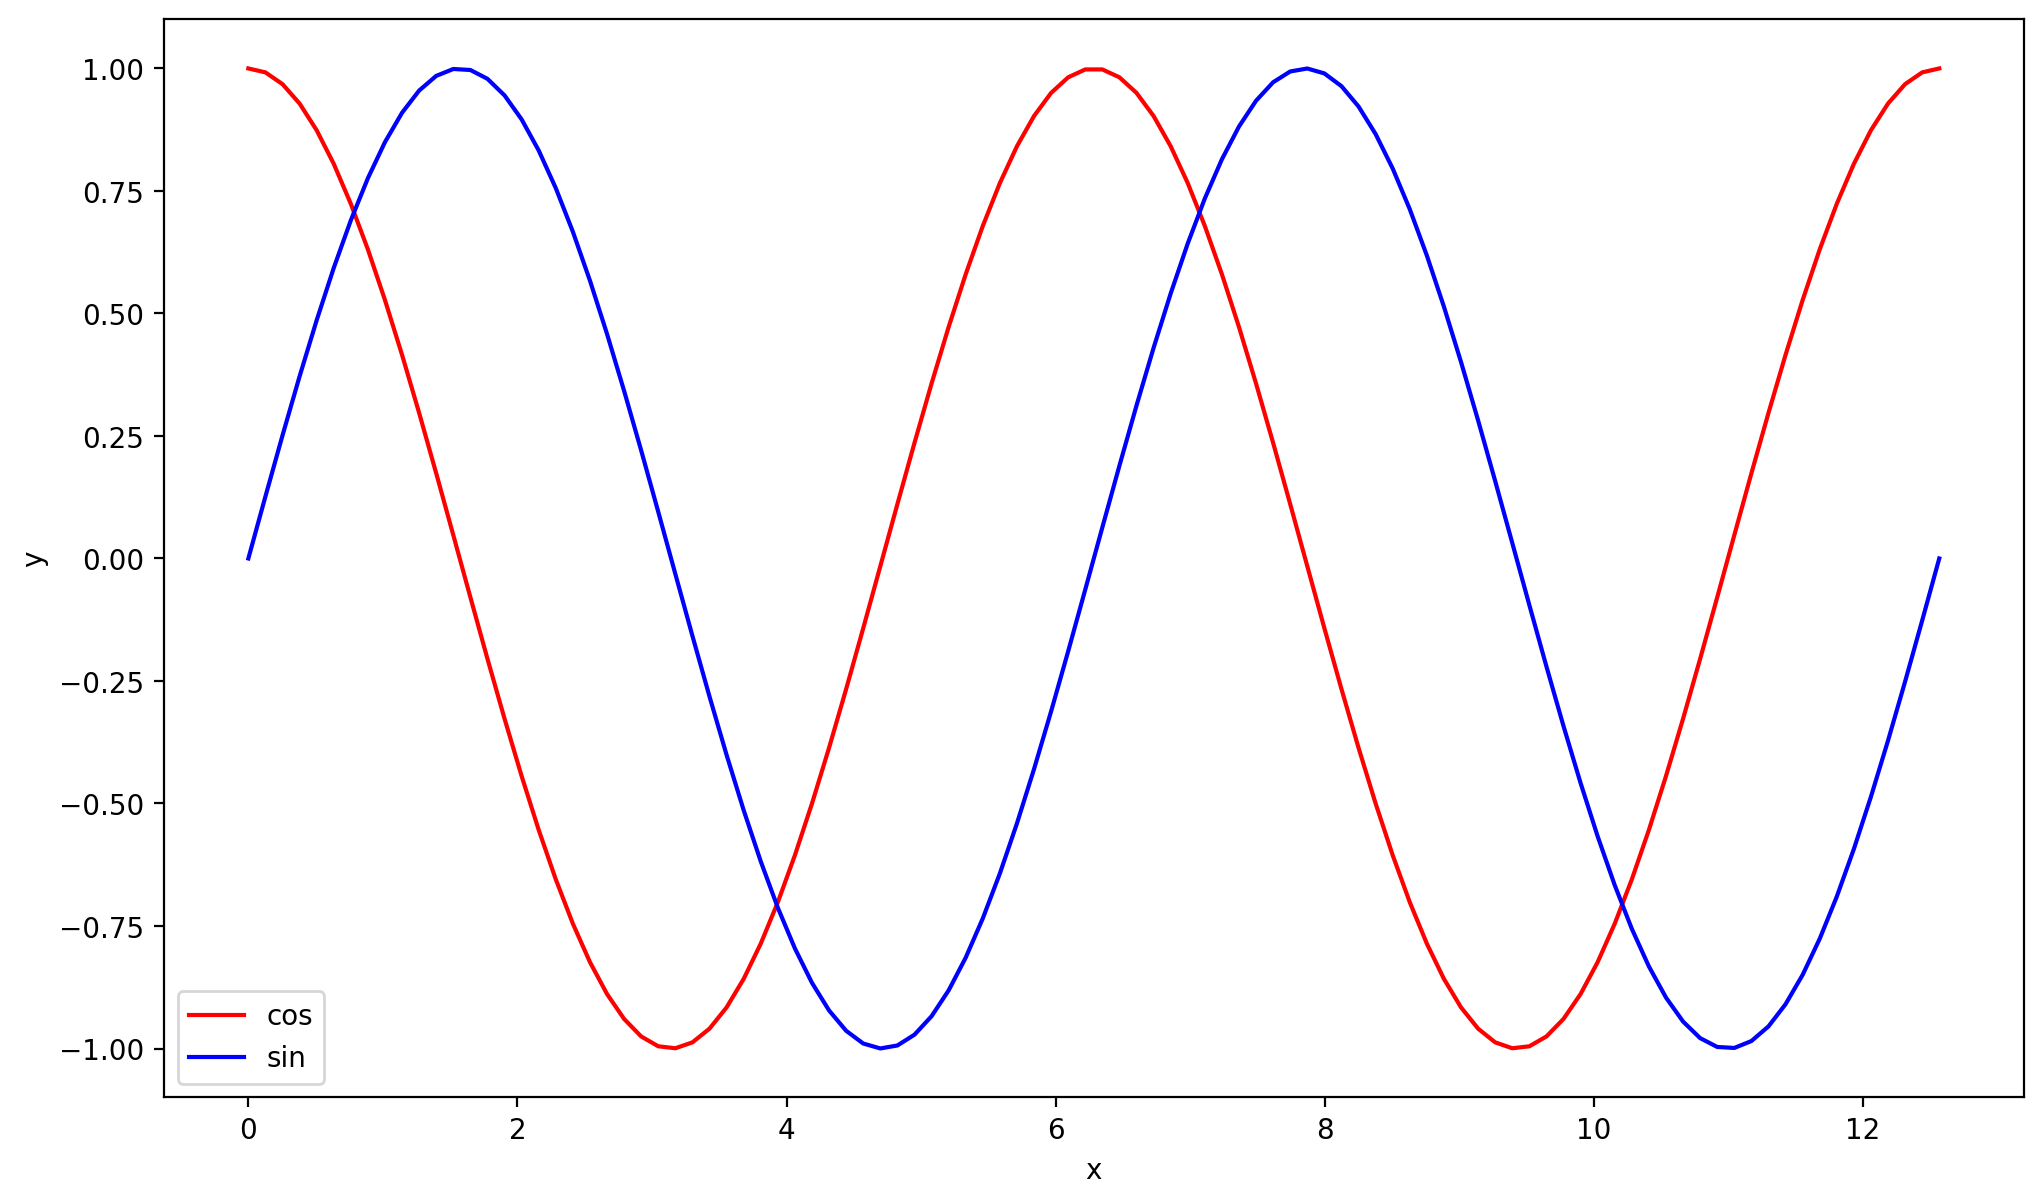

In [10]:
x = np.linspace(0, 4.0*np.pi, 100)

fig, axis = plt.subplots()
axis.plot(x, np.cos(x), 'r-', label='cos')
axis.plot(x, np.sin(x), 'b-', label='sin')

axis.set_xlabel('x')
axis.set_ylabel('y')

axis.legend() # draw a legend on figure

plt.show()

## Limits 

The graph above is OK, but I'm unhappy with the limits. You can set the x and y limits with ```set_xlim``` and ```set_ylim```:

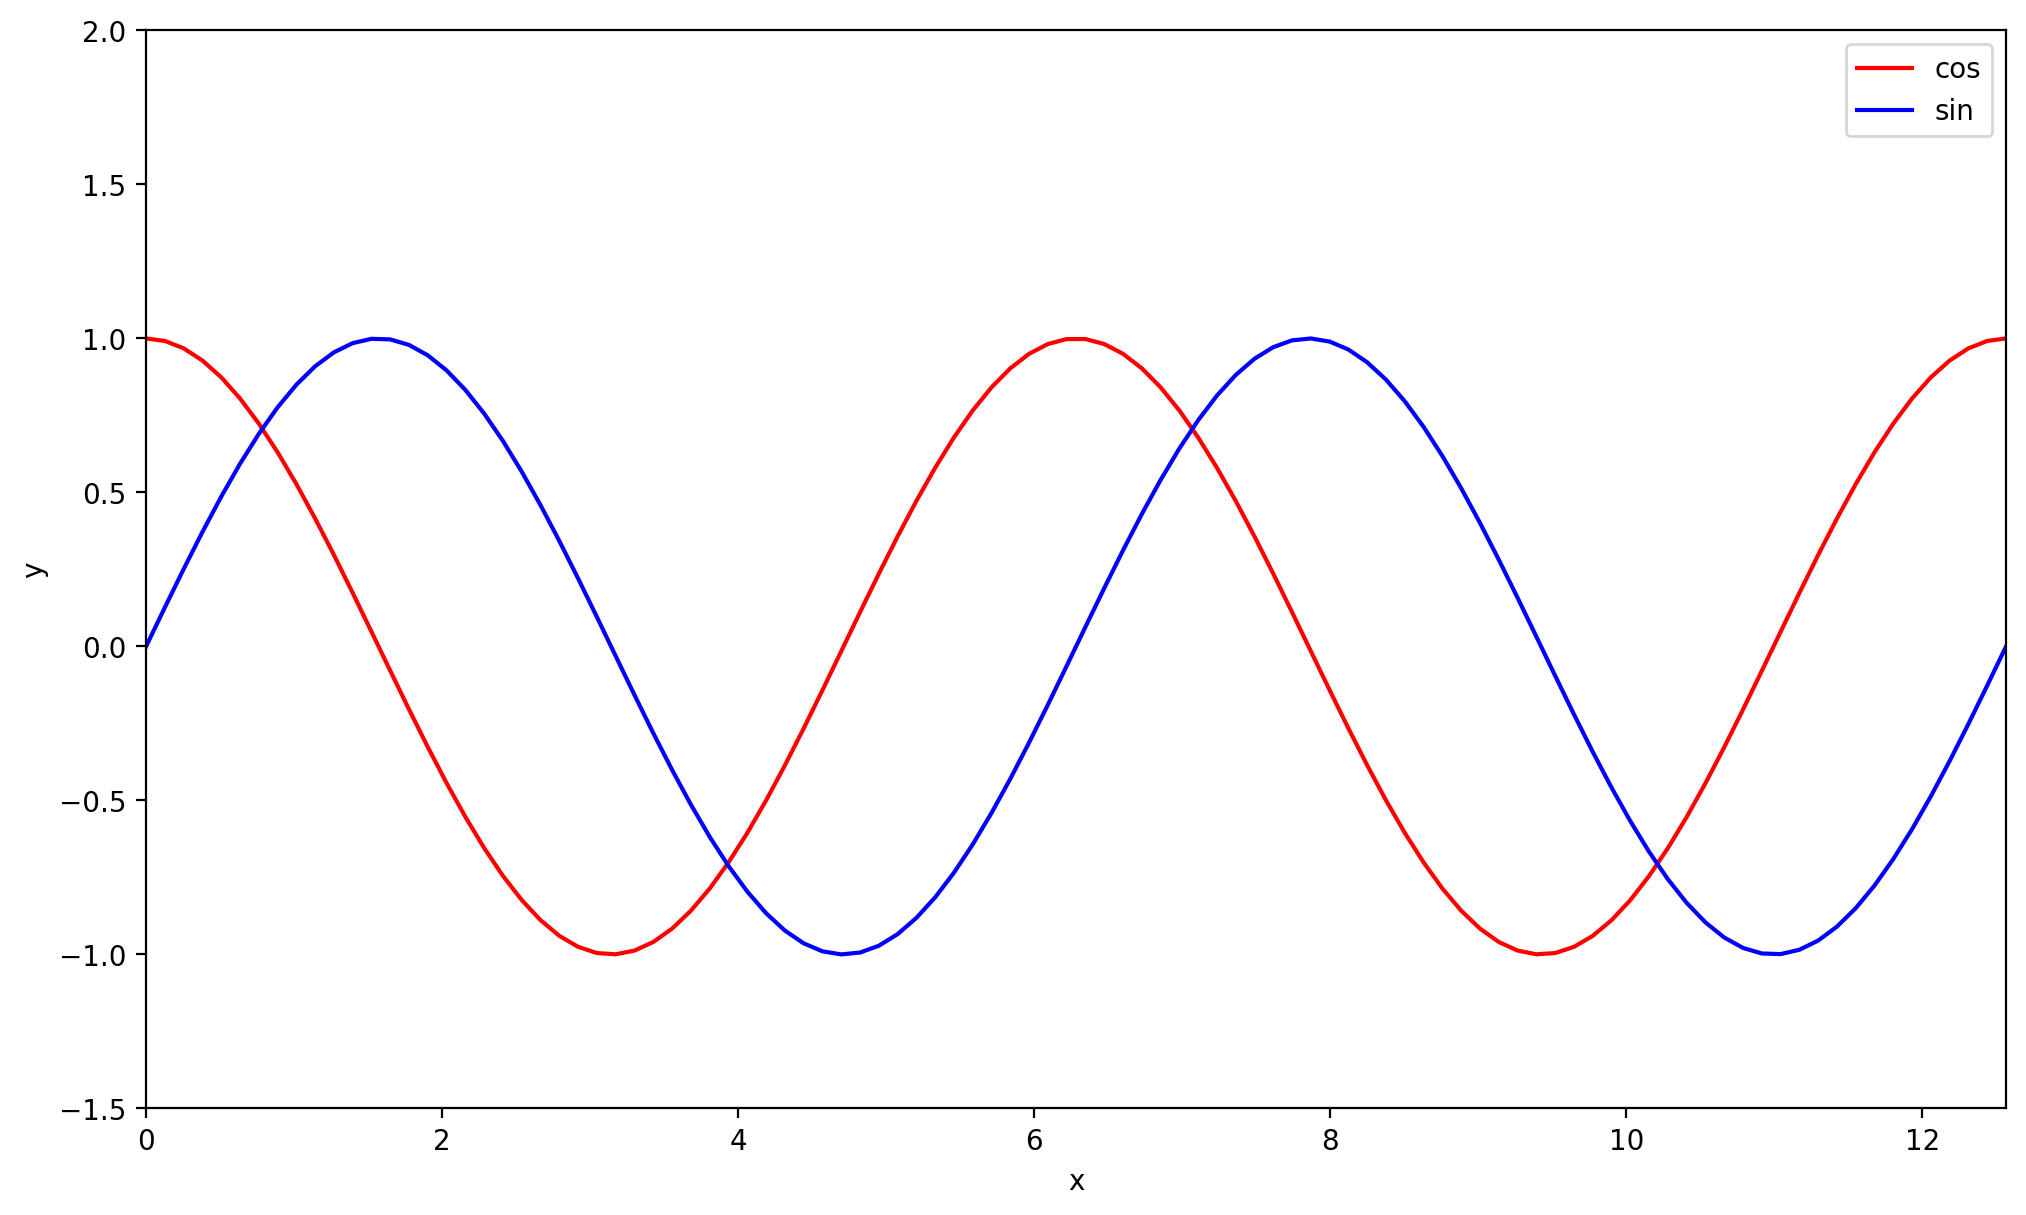

In [13]:
x = np.linspace(0, 4.0*np.pi, 100)

fig, axis = plt.subplots()
axis.plot(x, np.cos(x), 'r-', label='cos')
axis.plot(x, np.sin(x), 'b-', label='sin')

axis.set_xlabel('x')
axis.set_ylabel('y')

axis.legend() # draw a legend on figure

axis.set_ylim(-1.5, 2.0)
axis.set_xlim(0.0, 4.0*np.pi)

plt.show()

Much nicer!

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Simple X-Y plots</h2>
</div>
</section>

> On *one figure*, plot $y = \sin x$, $y = \cos x$ and $y = \tan x$ between $-\pi/2 < x < \pi/2$. Plot $\tan x$ with a dotted line, add a legend, and make sure that the limits are set sensibly.

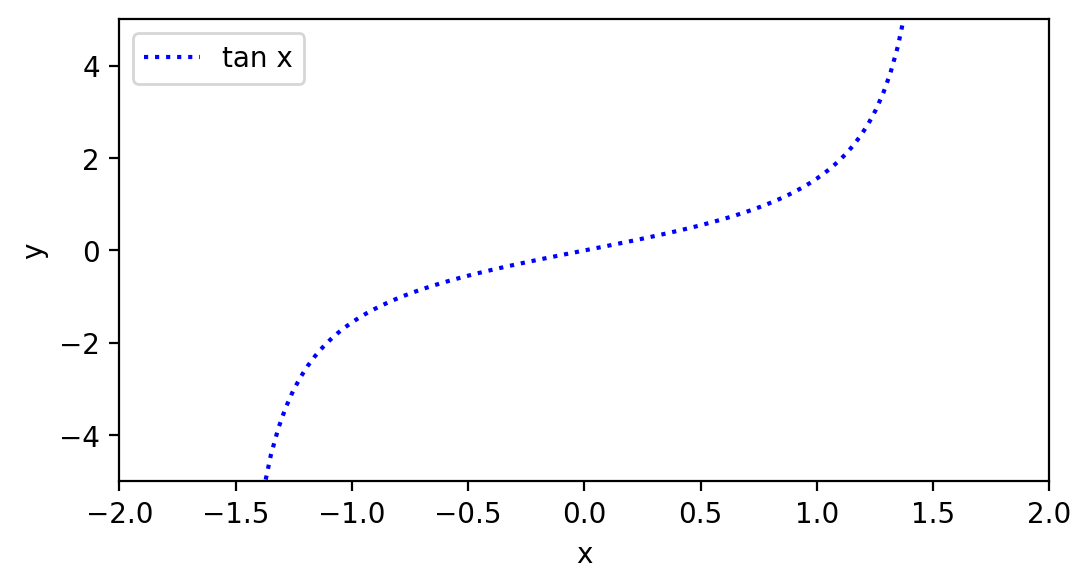

In [14]:
x = np.linspace(-np.pi/2.0, np.pi/2, 100)

fig, axis = plt.subplots(figsize=(6,3), dpi=100)
#axis.plot(x, np.cos(x), 'r-', label='cos')
#axis.plot(x, np.sin(x), 'b-', label='sin')

axis.plot(x, np.tan(x), 'b:', label='tan x')

axis.set_xlabel('x')
axis.set_ylabel('y')

axis.legend() # draw a legend on figure

axis.set_ylim(-5, 5)
axis.set_xlim(-2, 2)

plt.show()

## Figure size and saving figures

We can set the figure size by passing an argument to the ```subplots``` function. The ```figsize``` argument is the width and height of the figure in inches. We can also set the DPI (dots-per-inch) of the figure the same way:

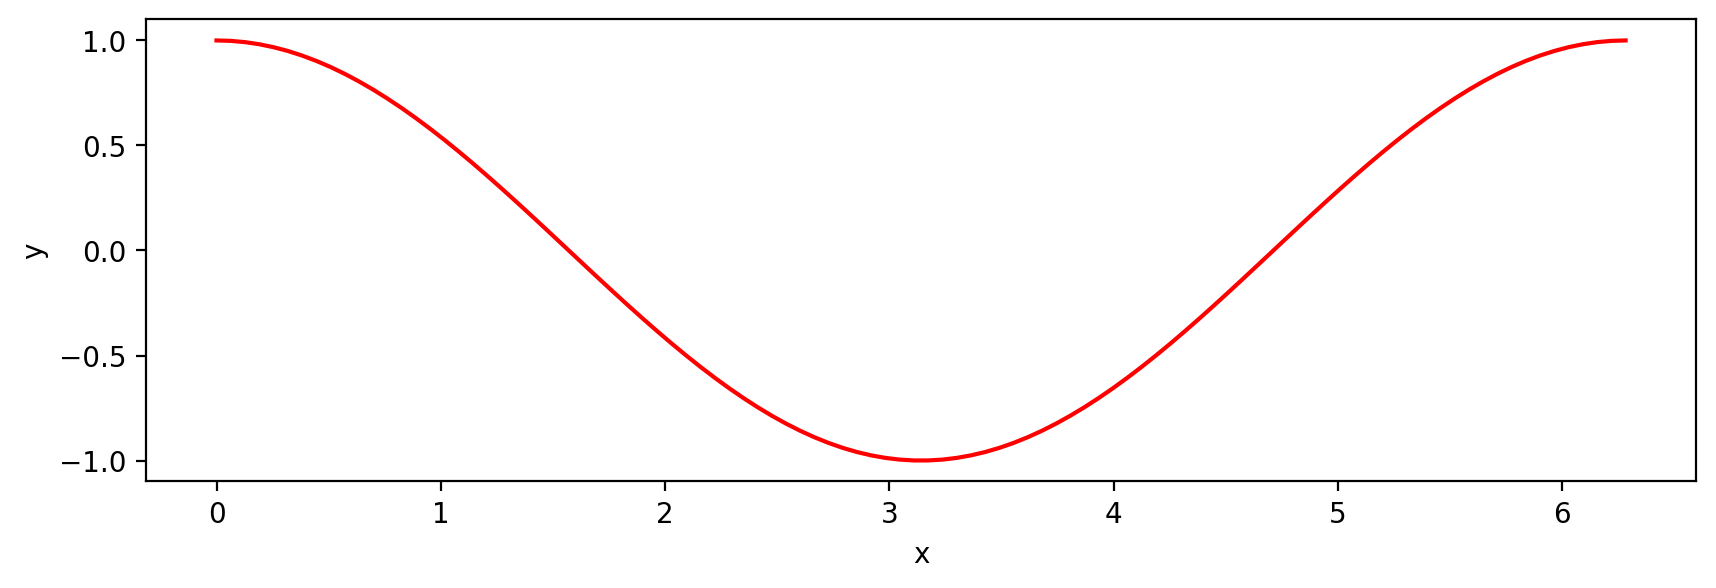

In [15]:
fig, axis = plt.subplots(figsize=(10, 3), dpi=100)

x = np.linspace(0.0, 2*np.pi, 100)
axis.plot(x, np.cos(x), 'r-')
axis.set_xlabel('x')
axis.set_ylabel('y')
plt.show()

### Saving figures

To save a figure to a file we can use the ```savefig``` method in the ```fig``` object:

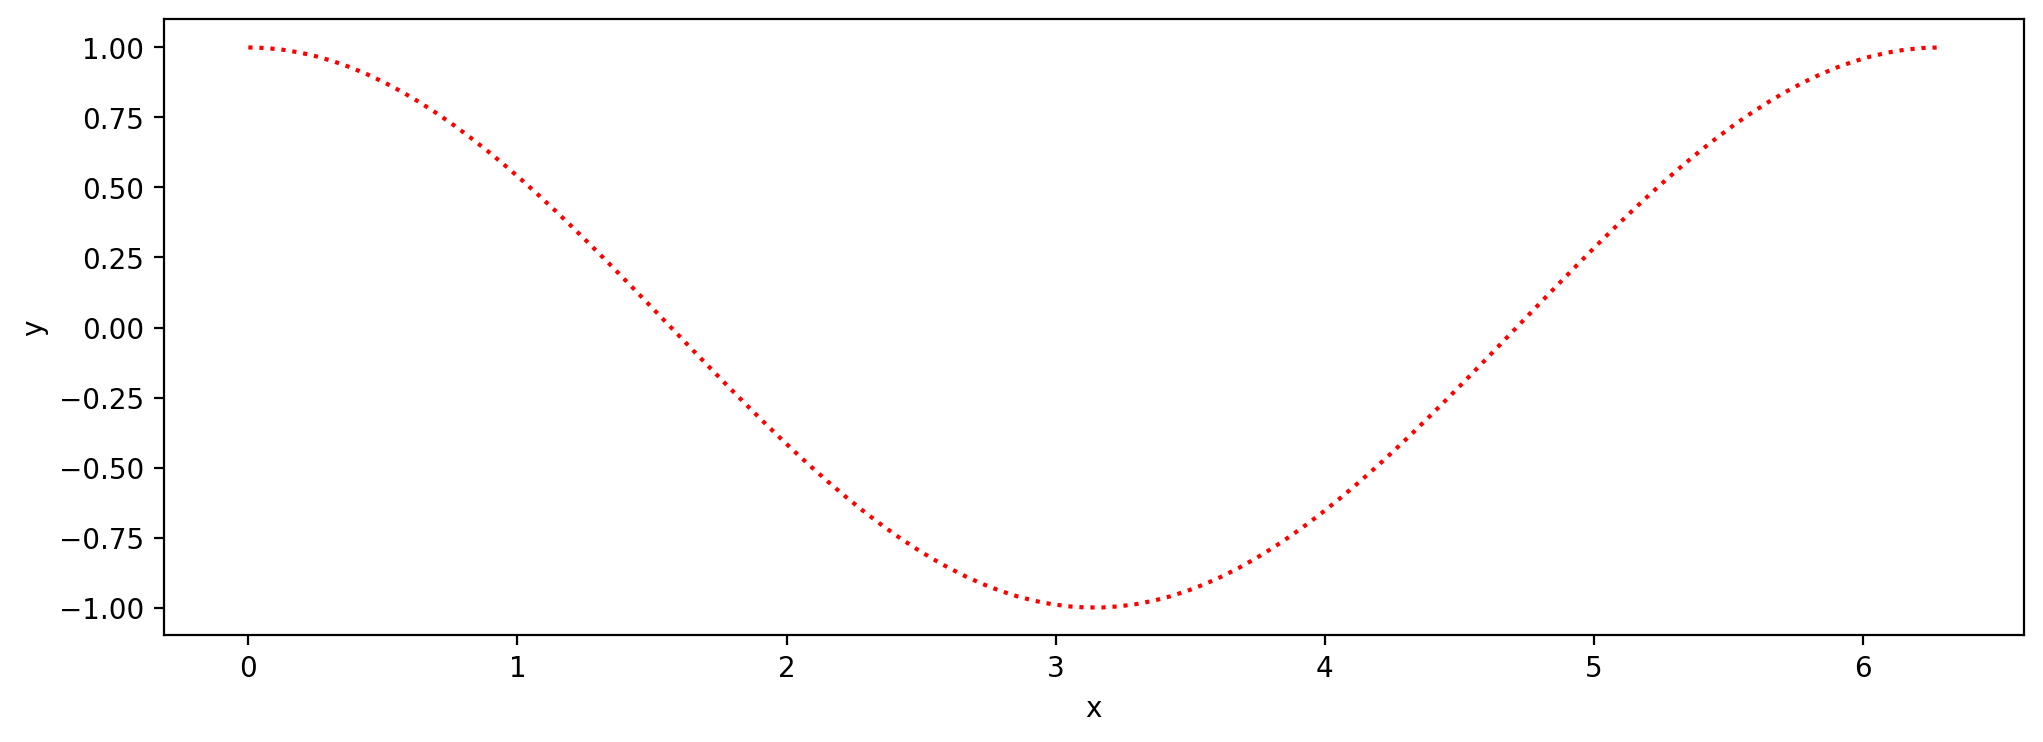

In [16]:
fig, axis = plt.subplots(figsize=(12,4), dpi=100)

x = np.linspace(0.0, 2*np.pi, 100)
axis.plot(x, np.cos(x), 'r:')
axis.set_xlabel('x')
axis.set_ylabel('y')
fig.savefig('filename.png')

A couple of things to note: many file formats are supported, notably PNG, JPG, PDF and SVG. You must call ```savefig``` **before** calling ```plt.show``` - the latter "empties" the figure object, so calling ```savefig``` afterwards will not do anything.

## Formatting lines, labels, axes

The plots shown so far are fine, but quite often we want to be able change the font sizes, line colors, line widths, line styles, etc. Matplotlib provides literally endless opportunities for plot formatting. Rather than go into them all here, I have provided a reference notebook (`01a_plotformatting.ipynb`) which you can use as a guide to make neatly formatted plots for publication.

---

## Other 2D plots

The ```plot``` method is fine for x, y line plots, but there are a number of other functions for making different kinds of plots. For a gallery of all the types of plots, you can look at the [matplotlib gallery](http://matplotlib.org/gallery.html) - each figure in the gallery shows the code used to produce it. Some of the more useful examples are shown below.

### Histograms

The example below generates 100,000 Gaussian random numbers, and plots the histogram and a normalised histogram, whose total area adds up to 1.

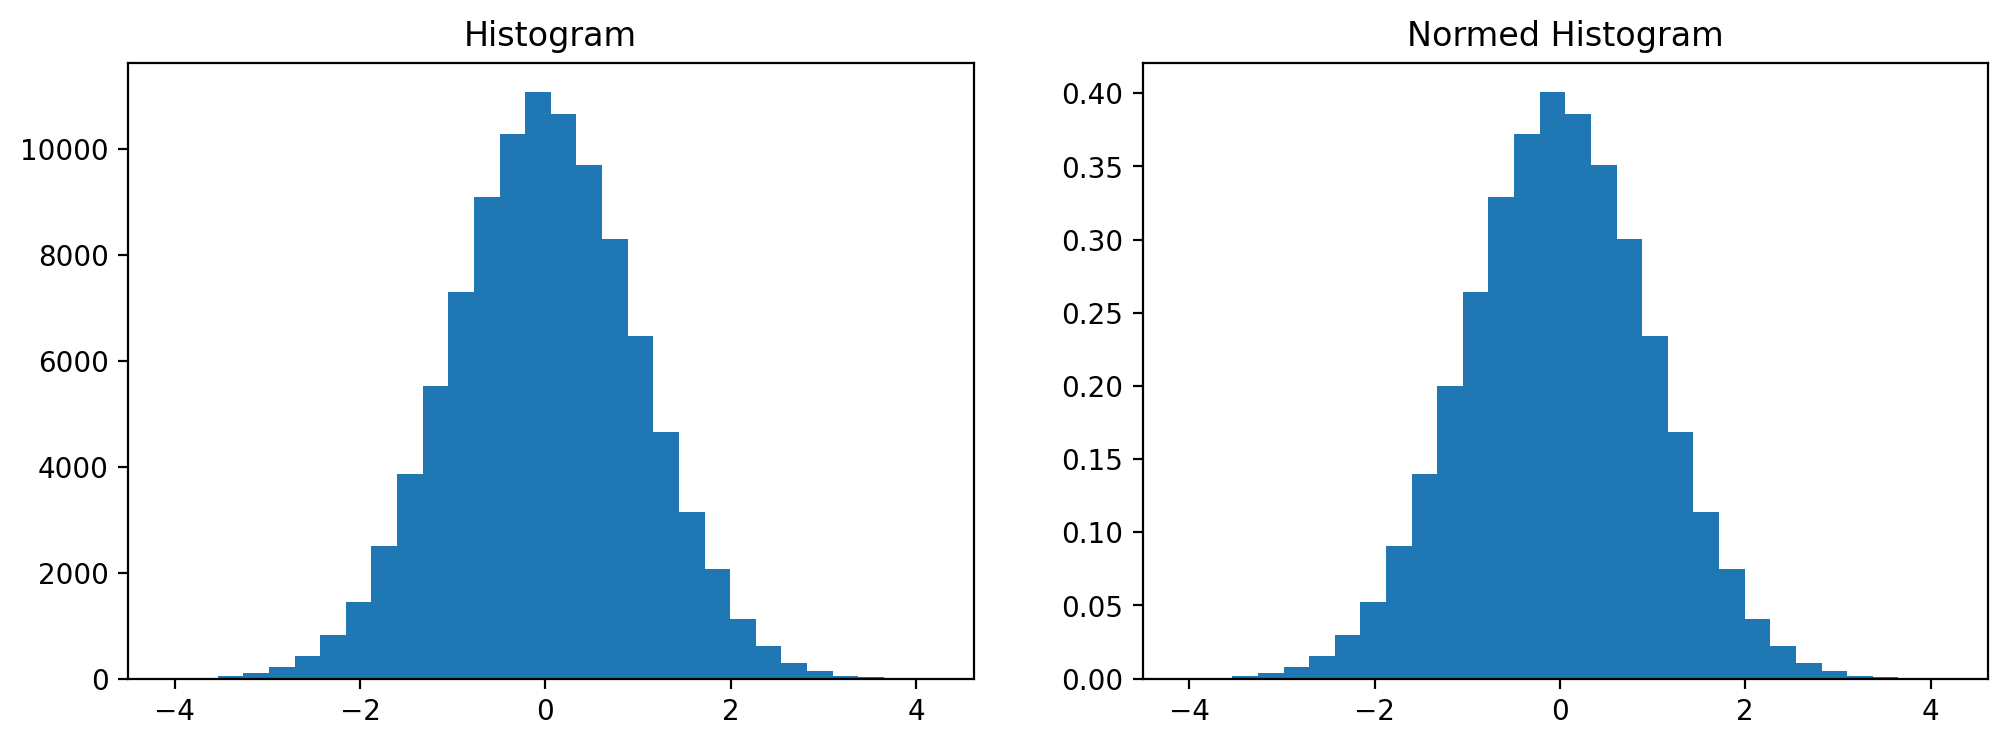

In [17]:
nums = np.random.normal(loc=0,scale=1,size=100000)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

axes[0].hist(nums, bins=30)
axes[0].set_title('Histogram')

axes[1].hist(nums, bins=30, density=True)
axes[1].set_title('Normed Histogram')

plt.show()

### Errorbar plots

If we're going to plot real data we need to be able to plot x,y data with errorbars! In the cell below I'm going to load in some example data - the brightness vs. time of an exoplanet host, Wasp-12. The data file format looks like this

```
54835.817914435 1.0027e+00 1.5118e-03
54835.818901894 1.0046e+00 1.5249e-03
54835.819911092 1.0029e+00 1.4443e-03
54835.820920291 1.0016e+00 1.4374e-03
```

The three columns are time, flux and error.

In [18]:
# Look! Notice the use of unpack=True and list unpacking to get 3, seperate 1D arrays
x, y, e = np.loadtxt('../../data/Session2/wasp12.txt', unpack=True)
print(x[0:5])

[54835.81791443 54835.81890189 54835.81991109 54835.82092029
 54835.82190186]


Now I can use the ```errorbar``` function to plot this data. By default the ```errorbar``` command will join up the points with a line, note how I disable this line, and set the marker style using the `fmt` argument:

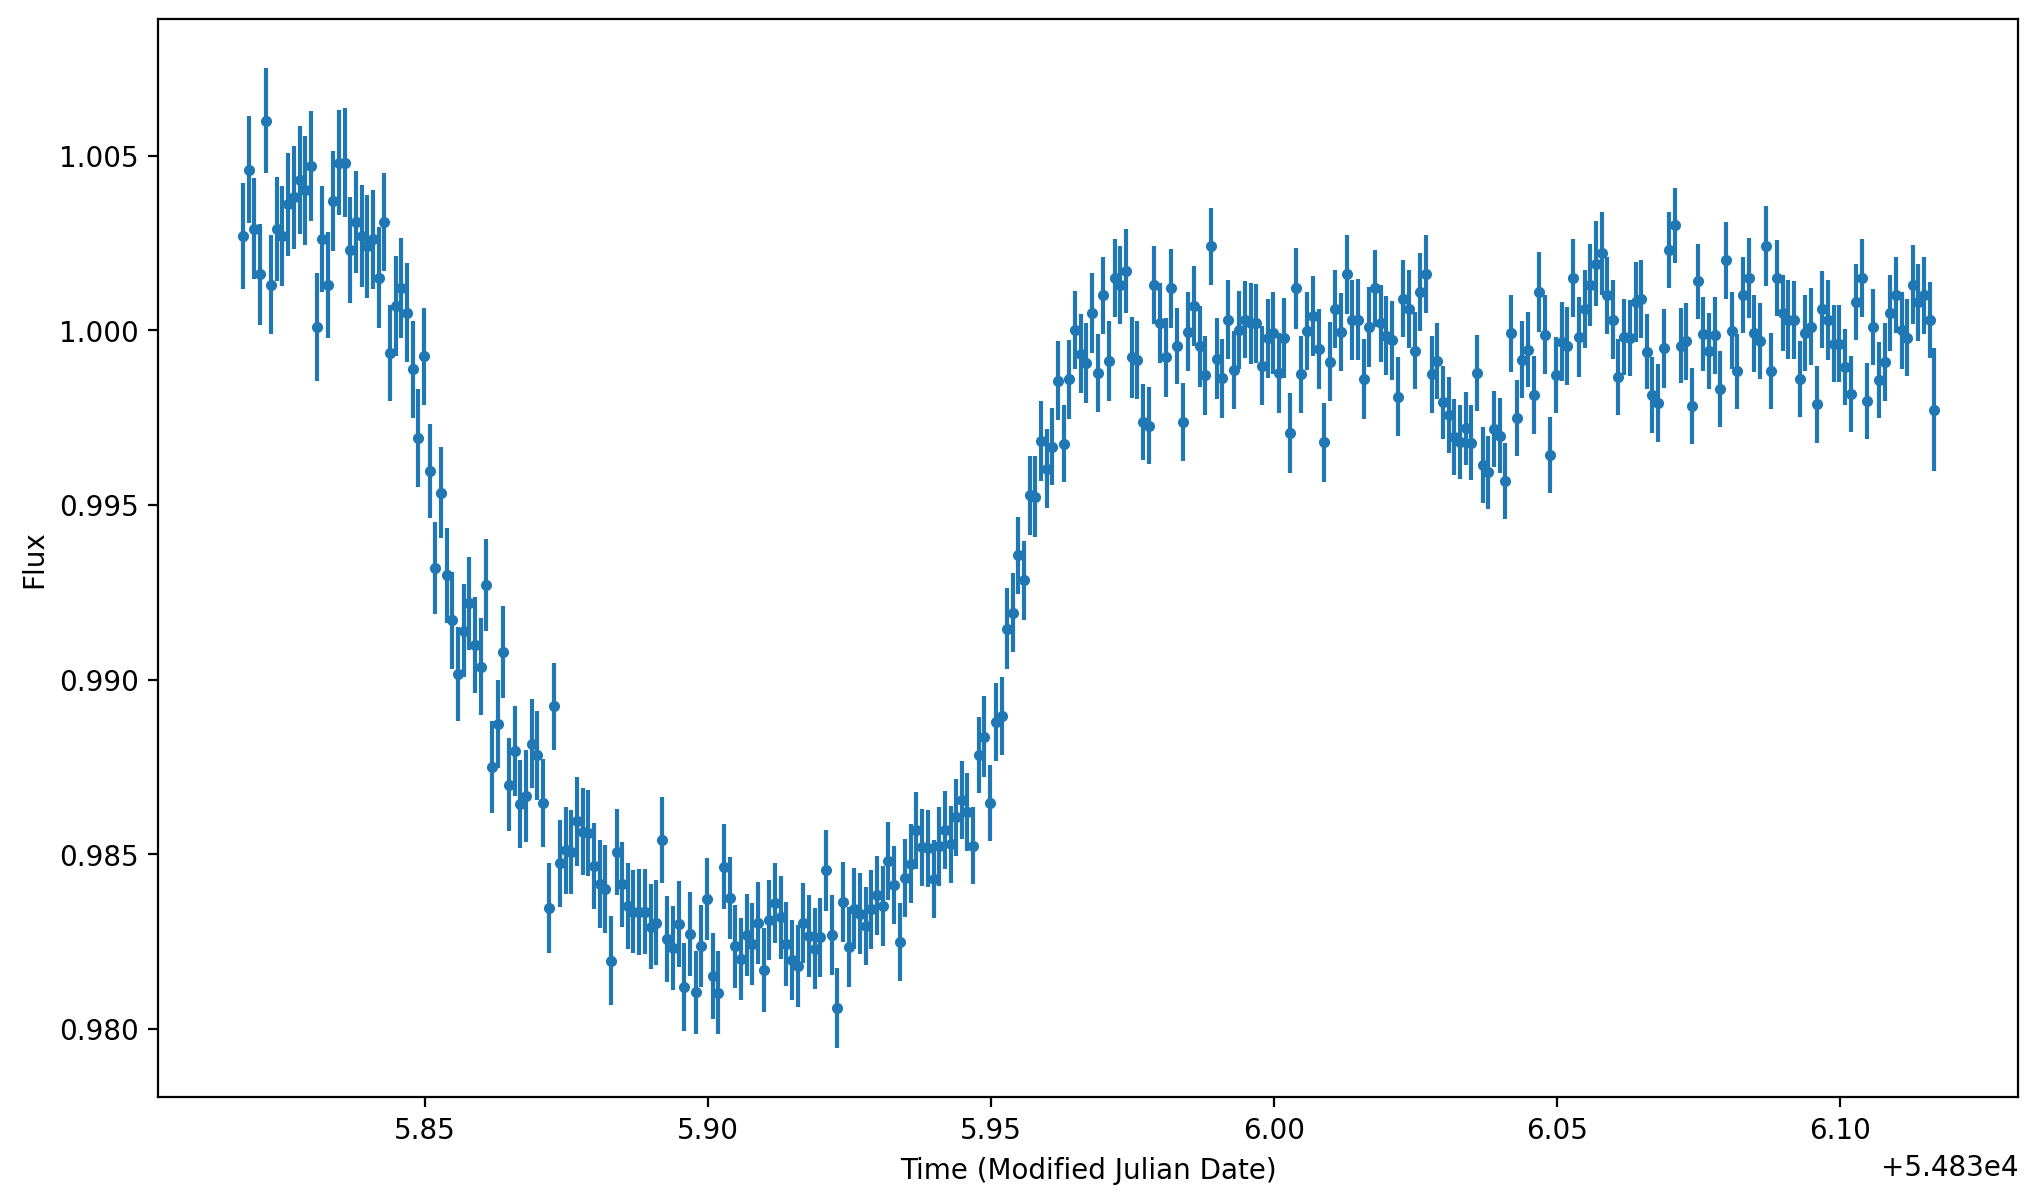

In [19]:
fig, axis = plt.subplots()

axis.errorbar(x, y, yerr=e, fmt='.')
axis.set_xlabel('Time (Modified Julian Date)')
axis.set_ylabel('Flux')

plt.show()

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Error bar plots</h2>
</div>
</section>

> Tidy up the error bar plot above:

* the x-axis data start at 54835.8179... Subtract off the integer part and adjust the x-axis label to reflect this
* Change the errorbar and marker color to red
* adjust the transparency (alpha) of the points to 0.8
* Change the y-axis label to "Normalised Flux"

> You might find it useful to look at the help for the errorbar function.



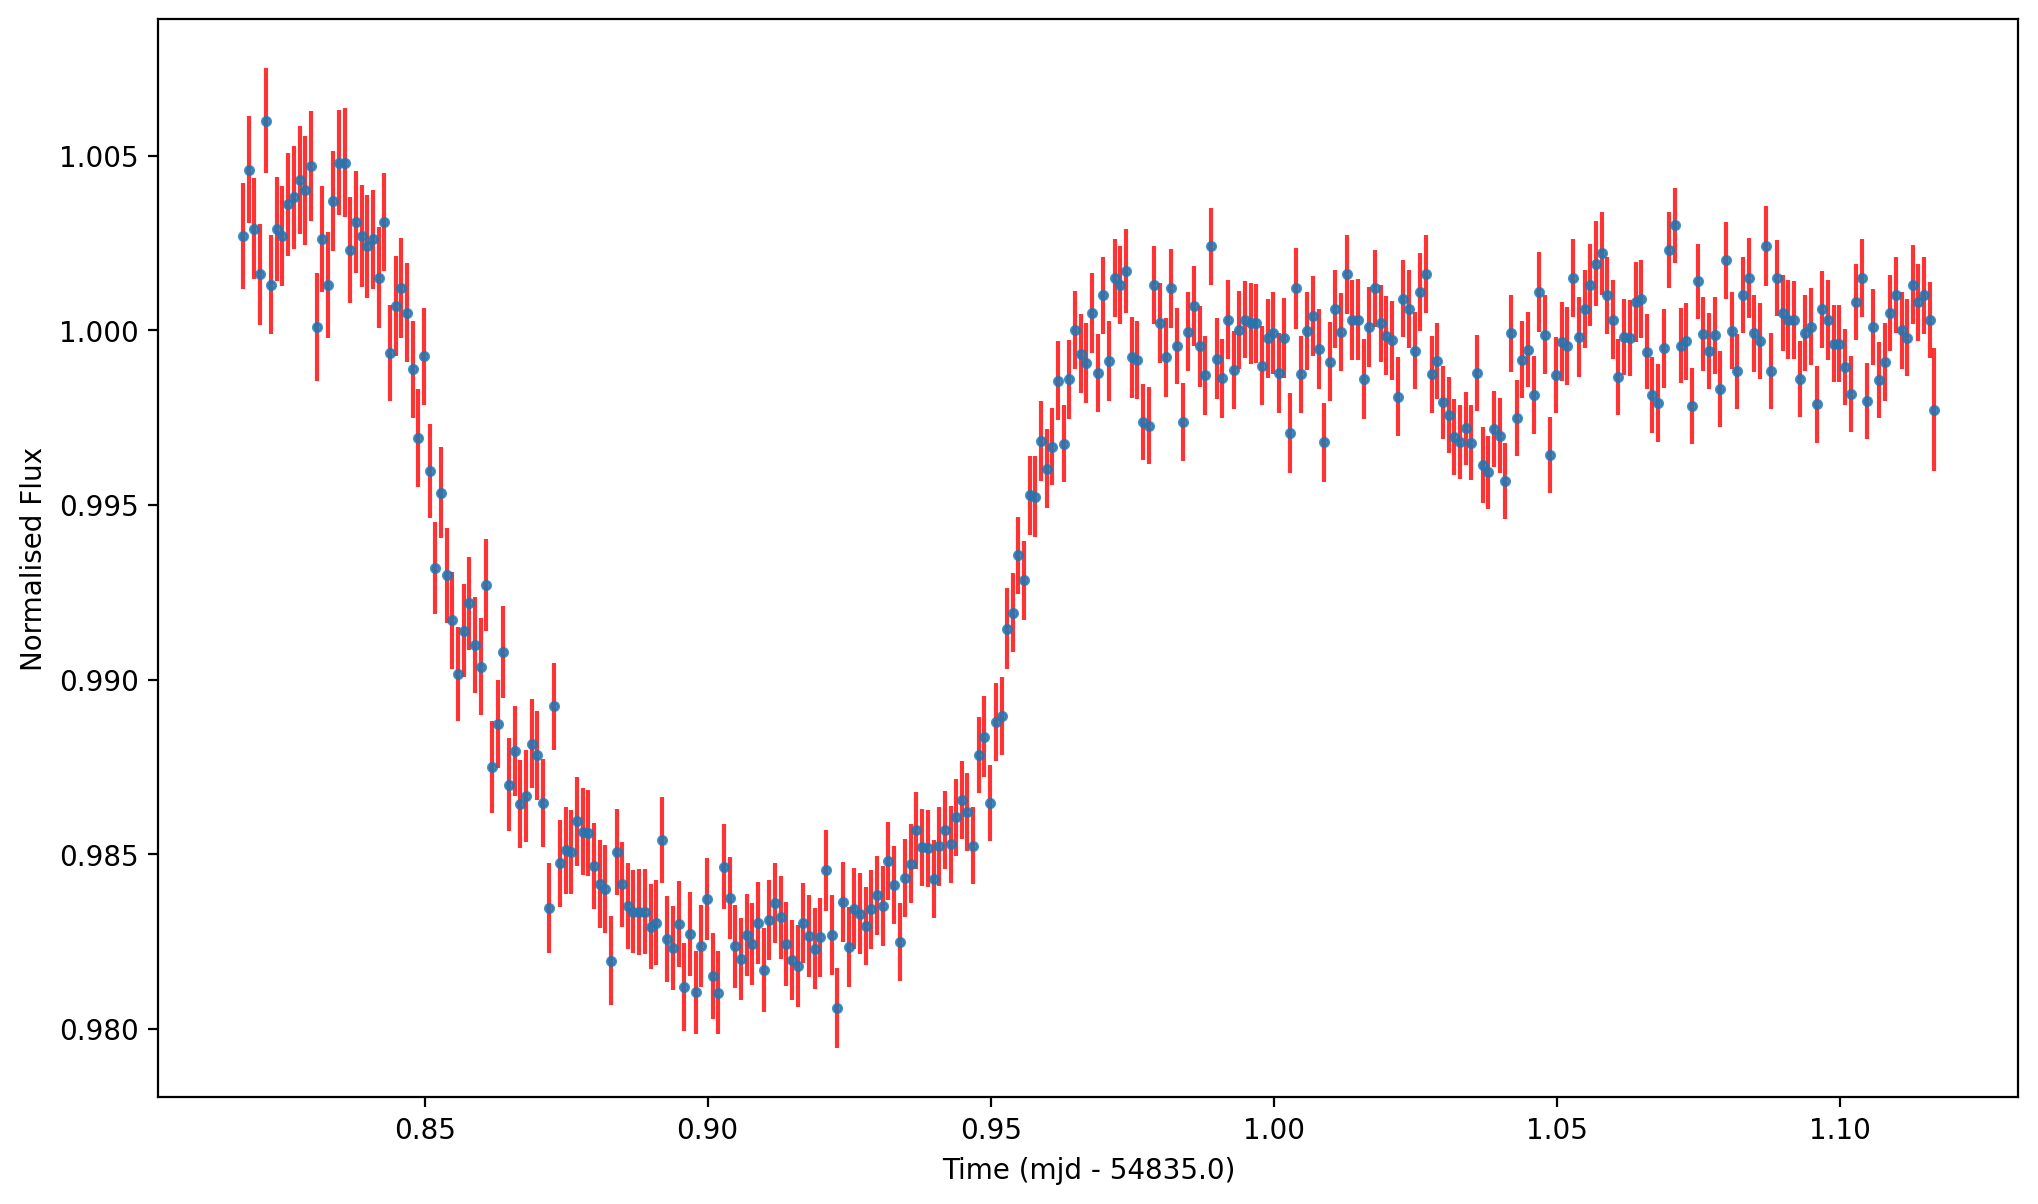

In [20]:
fig, axis = plt.subplots()


x_integer = np.floor(x.min())
x_new = x - x_integer

axis.errorbar(x_new, y, yerr=e, fmt='.', ecolor='r', alpha=0.8)
axis.set_xlabel(f'Time (mjd - {x_integer})')
axis.set_ylabel('Normalised Flux')

plt.show()

### Scatter plots

The ```scatter``` function is useful for scatter plots, particularly ones where you want marker sizes and colours to differ:

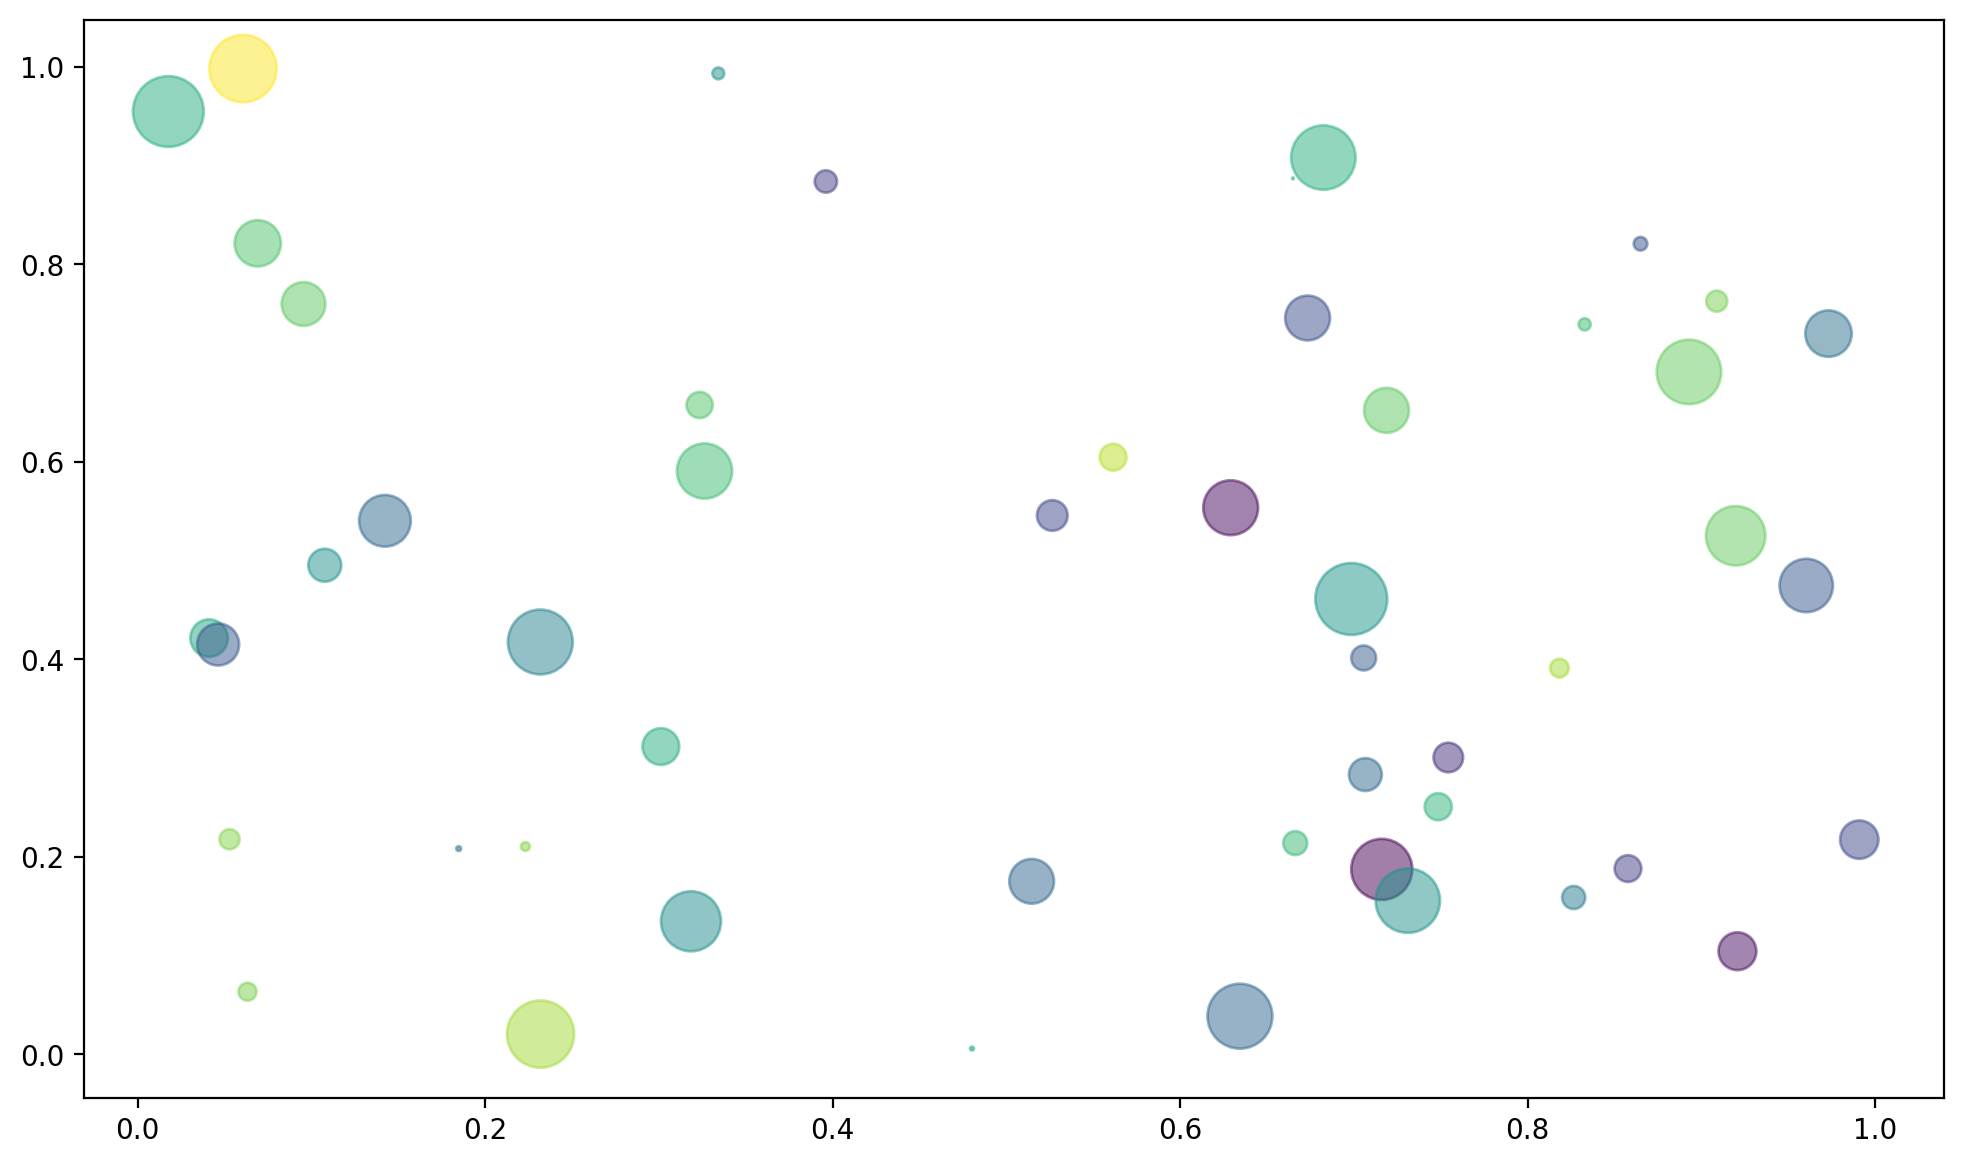

In [11]:
N = 50
x = np.random.uniform(size=N)
y = np.random.uniform(size=N)
colors = np.random.uniform(size=N)
area = np.pi * (15 * np.random.uniform(size=N))**2 # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Image plots

One thing that astronomers do a lot of is plotting images! Matplotlib has excellent support for plotting images. Here I will use the ```astropy``` library to load a FITS image of the Pleiades (there'll be more on reading FITS images in a later session).

In [12]:
import astropy.io.fits as fits
image = fits.getdata('../../data/Session2/pleiades.fits')

# image is just a numpy array
print (image.mean())
print (image.std())
print (image.shape)

0.004578544
0.0012347769
(875, 875)


We can see the image is 875x875 pixels. We can use the ```imshow``` command to plot this image:

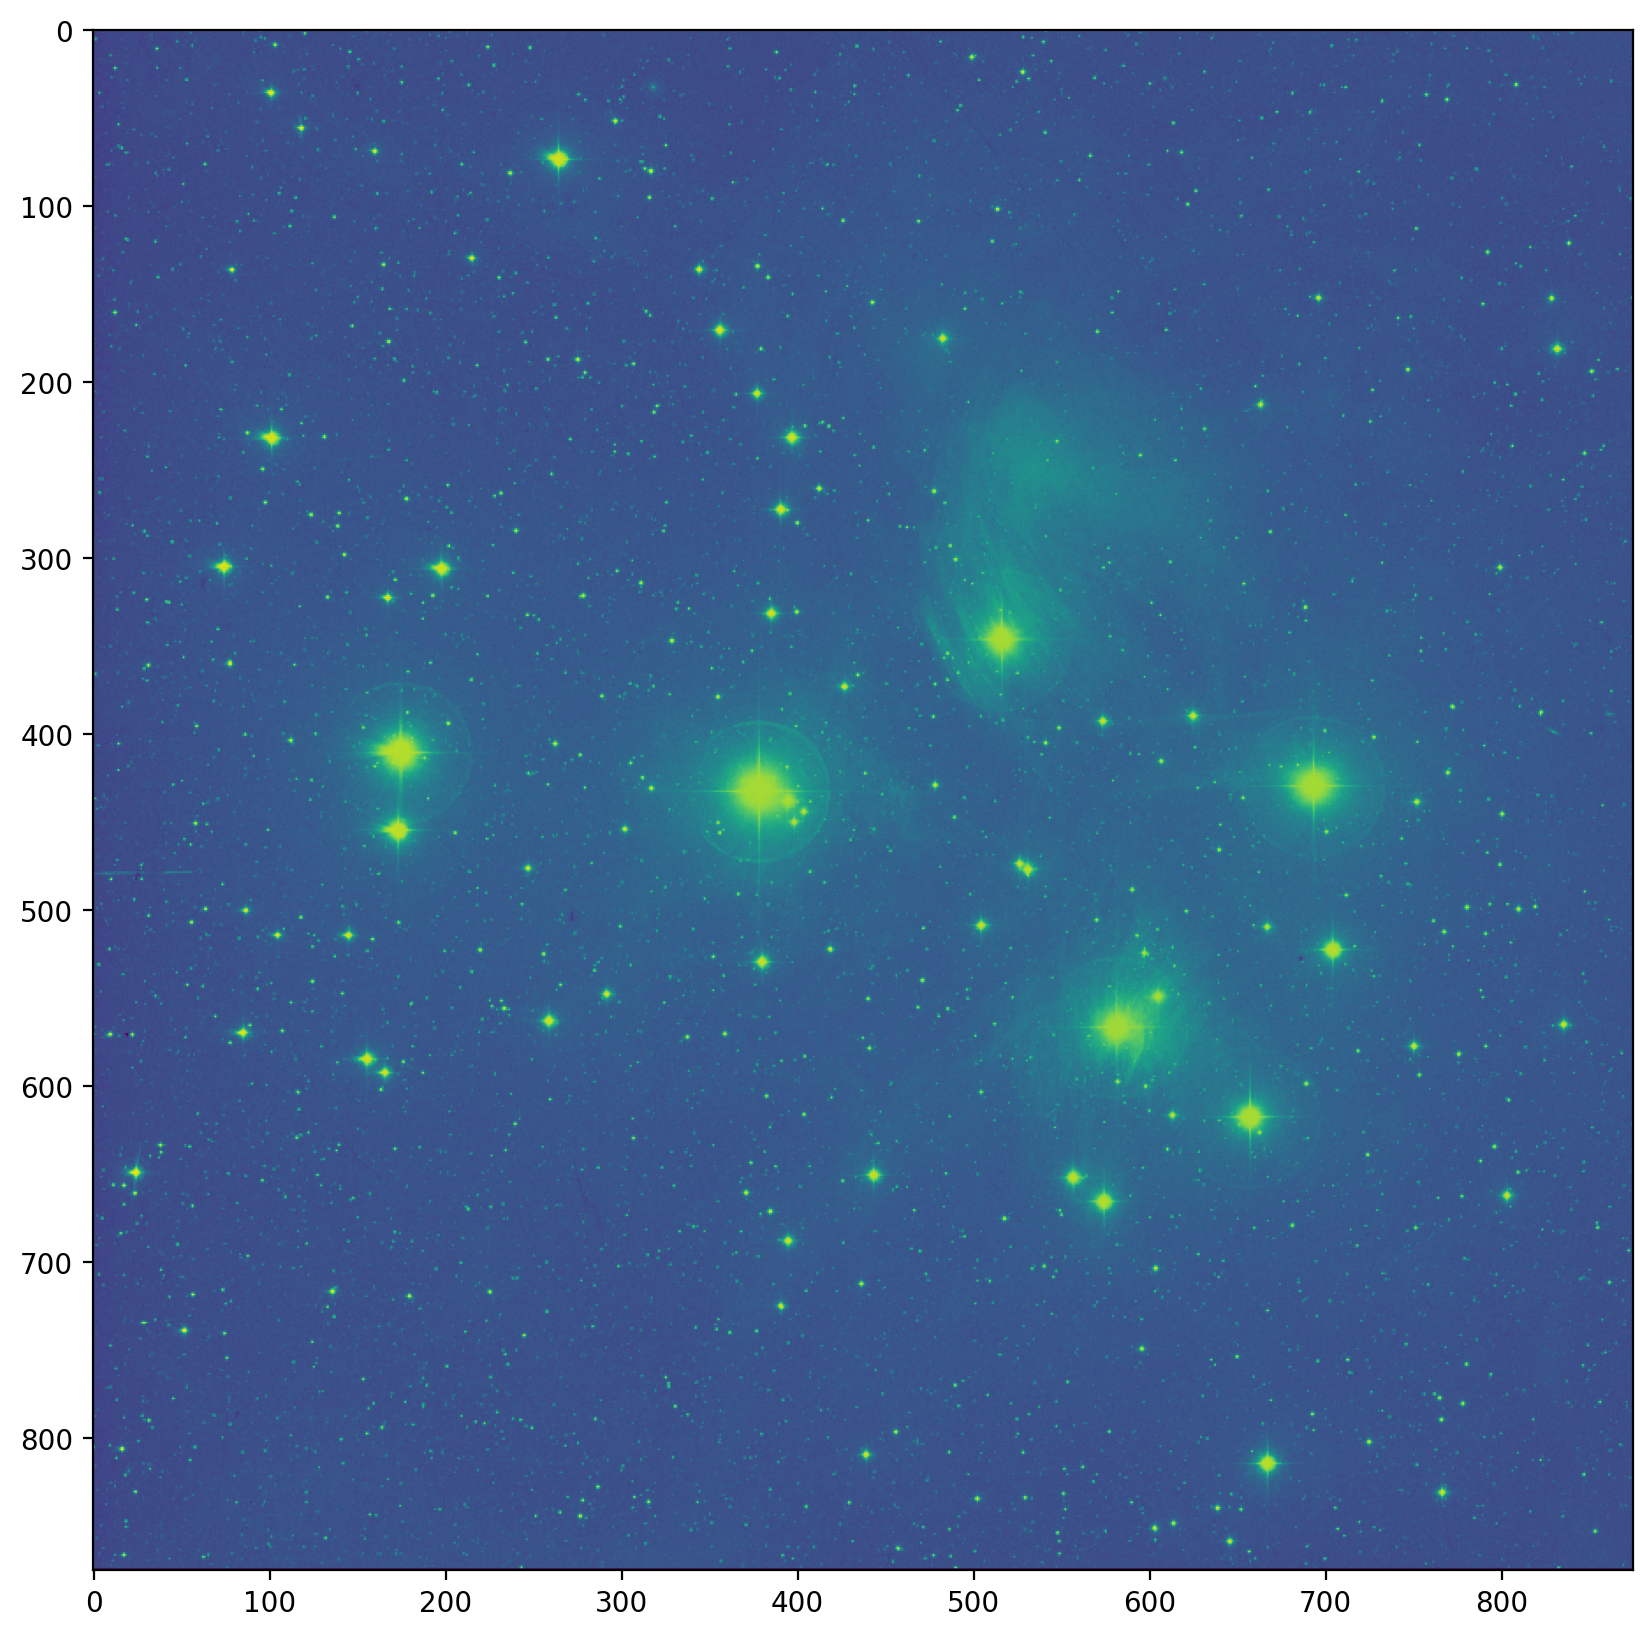

In [13]:
fig, axis = plt.subplots(figsize=(10,10))
axis.imshow(image)
plt.show()

This is not great. The [colormap](../../resources/reference.html#colormap) looks like an unusual choice for stars, and the image doesn't seem to be the right way up.

The reason for the image orientation is that it is a convention in computer graphics for the [0,0] element of the array in the upper left. We would normally think of the [0,0] array element being bottom left.

We'll go into more detail about plotting images in the session on image handling, but for now let's change the [colormap](../../resources/reference.html#colormap) to be a greyscale, and fix the location of the origin.

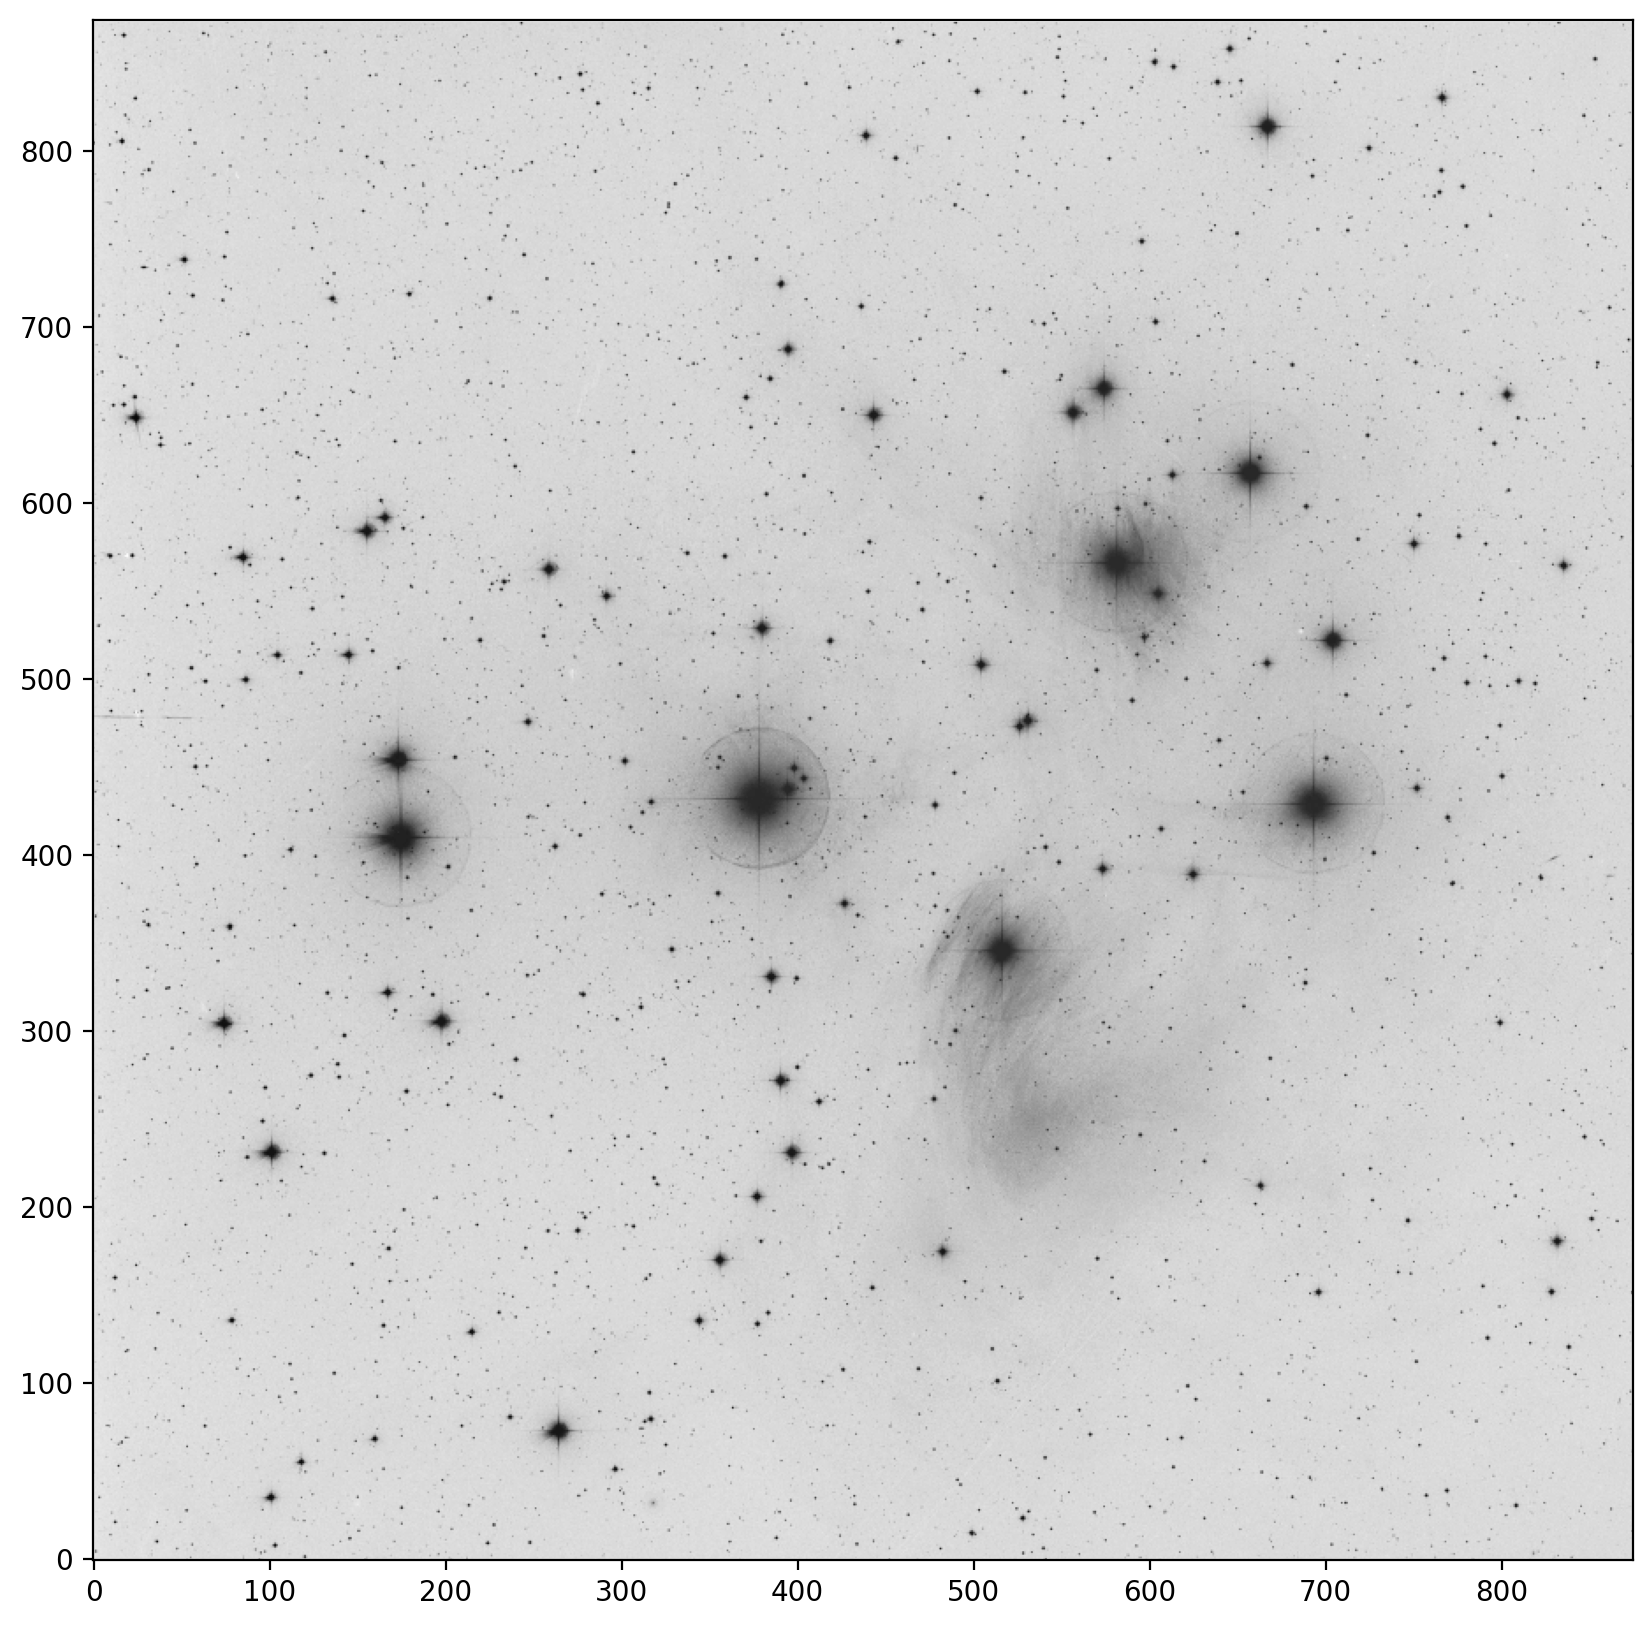

In [14]:
fig, axis = plt.subplots(figsize=(10,10))
implot = axis.imshow(image, cmap=plt.get_cmap('Greys'), origin='lower')
axis.grid(False)
plt.show()

## 3d Plots

We won't go into 3D plotting in much detail. but it's worth pointing out that 3D axes can be created by creating a figure and calling the "get current axis" function ```gca``` with the ```projection='3d'``` argument:

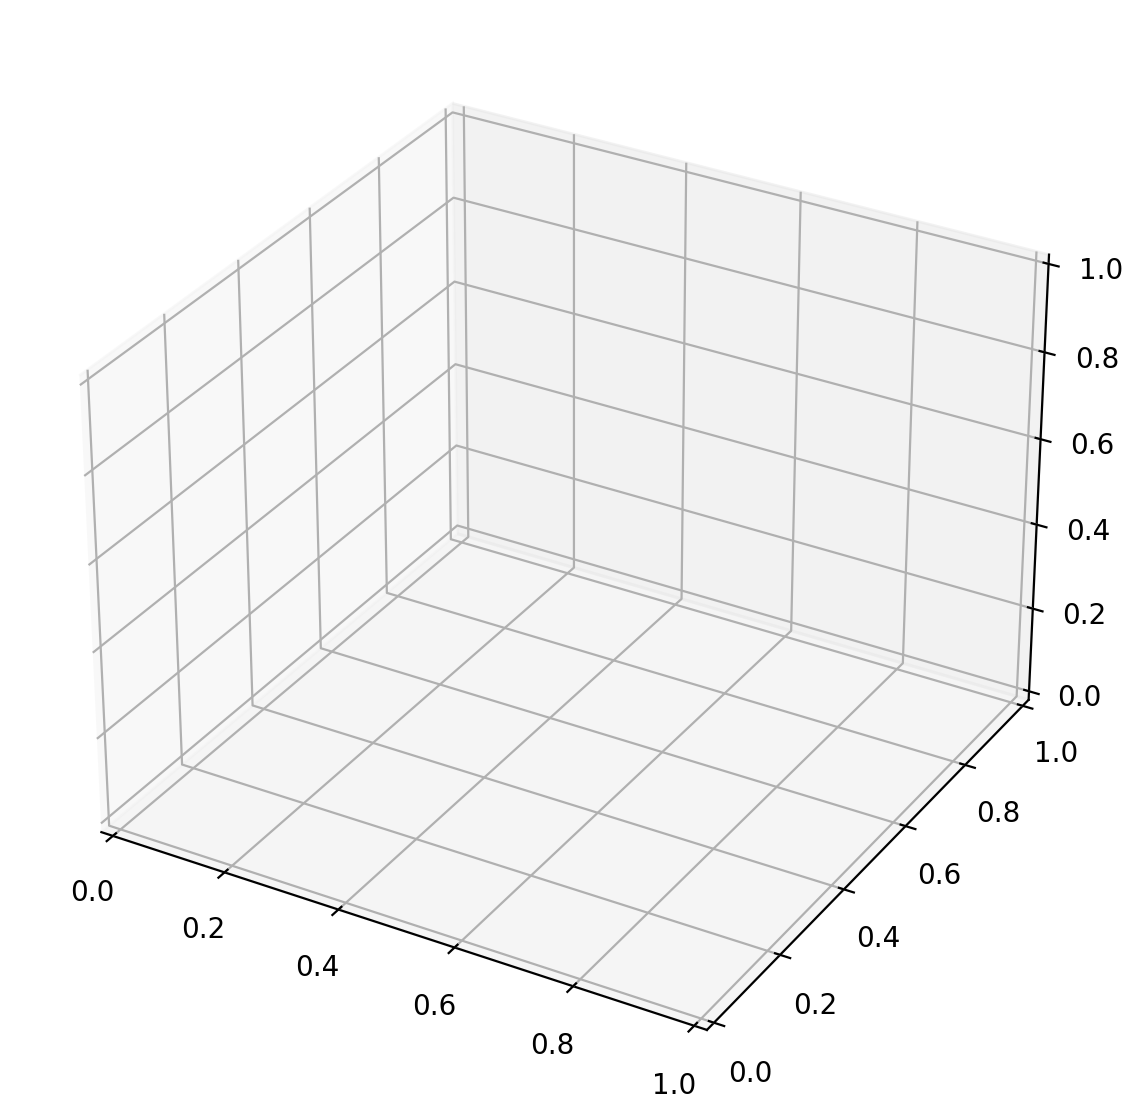

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
axis = fig.add_subplot(projection='3d')

As a quick example, I've made a 3D scatter plot of some random points below. For more information on 3D plotting in matplotlib, see the tutorial [here](https://beta.oreilly.com/learning/three-dimensional-plotting-in-matplotlib).

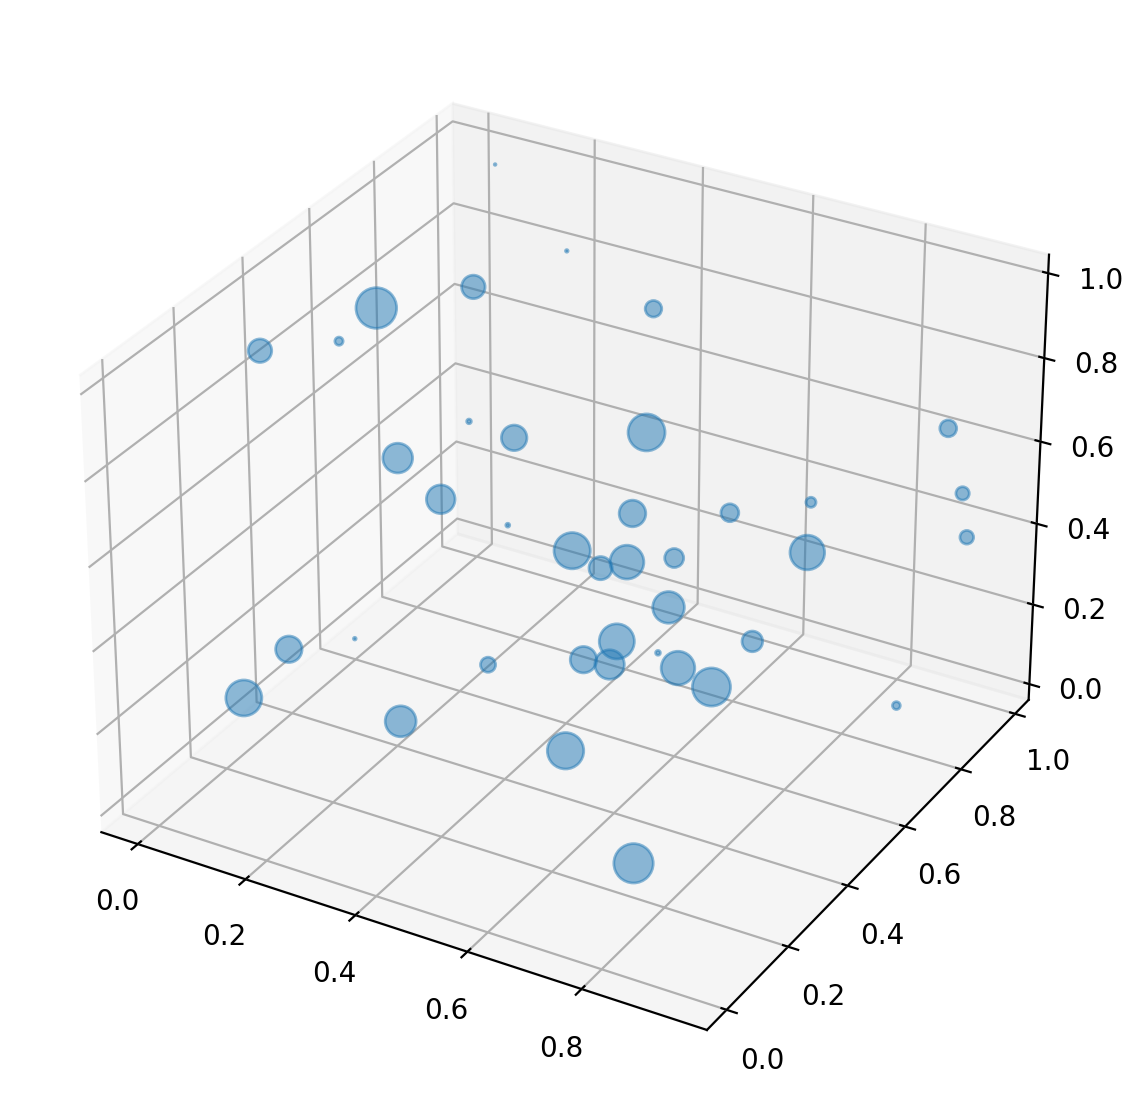

In [16]:
# rather than embed in notebook, uncomment the line below to 
#plot outside the notebook. For 3D plots, this allows interaction

#%matplotlib gtk

N = 40
x = np.random.uniform(size=N)
y = np.random.uniform(size=N)
z = np.random.uniform(size=N)
area =  15 * np.random.uniform(size=N)

fig = plt.figure()
axis = fig.add_subplot(projection='3d')
axis.scatter(x,y,z,s=area**2,alpha=0.5)
plt.show()

---
## Printing out formatted text

As well as plotting graphs, printing out nicely formatted text can be important for presenting your results. In Python 3 this is done using the ```format``` method. All Python strings have a format method, which is used like so

In [69]:
x = 100.1010101
a_string = "The value of x is {}"
print (a_string.format(x))

The value of x is 100.1010101


The ```format``` method works by replacing any curly brackets within the string by the arguments it is given. You can use as many curly brackets as you like:

In [72]:
x = np.random.normal(loc=10, scale=1, size=100000)
a_string = "The mean of x is {}, the standard deviation is {}"
print (a_string.format( x.mean(), x.std() ))

The mean of x is 10.002990850269235, the standard deviation is 1.0020706062606375


What if we want to change the number of decimal places? Python has a number of *string formatting codes* that allow us to specify how we want the string to look. For example, decimal numbers are formatted with a code like ```:.2f``` which means "print out a floating point number with 2 decimal places:

In [73]:
x = np.random.normal(loc=10, scale=1, size=100000)
a_string = "The mean of x is {:.2f}, the standard deviation is {:.2f}"
print (a_string.format( x.mean(), x.std() ))

The mean of x is 10.00, the standard deviation is 1.00


Rather than produce a complete view of string formatting I'll refer you to this [nice online guide](https://mkaz.com/2012/10/10/python-string-format/).

---------
<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h1>Homework #2</h1>
<h2><span class="fa fa-pencil"></span>Plotting and working with data</h2>
</div>
</section>

> This homework blends together elements of last week's session on numpy arrays and file IO with this week's session on plotting data. 

> The file located at "../../data/Session2/gapminderDataFiveYear.csv" looks like this

```
country,year,pop,continent,lifeExp,gdpPercap
0,1952,8425333.0,3,28.801,779.4453145
0,1957,9240934.0,3,30.332,820.8530296
0,1962,10267083.0,3,31.997,853.10071
0,1967,11537966.0,3,34.02,836.1971382
0,1972,13079460.0,3,36.088,739.9811058
0,1977,14880372.0,3,38.438,786.11336
```

> As you can see, it contains life expectancy and GDP data for a range of countries over a range of years up until 2007. Your job this week will be to show this data using matplotlib's scatter function. For example, a plot for the year 2007 might look something like this:

<img src="../../images/rosling_plot_2007.svg" width="500px"/>

In [99]:
def get_column(data, col_num):
    """Filter a numpy array and return the requested column.

    Given a 2D numpy array, and a column number, this function returns the 
    requested column number as a 1D numpy array.

    Args:
        data (numpy.ndarray): the array to filter
        col_num (int): the column number to return (e.g `0` for the first column in the array).
    """
    # here's an example of using defensive programming to make sure data is a 2D array
    # notice how we run these checks before doing anything else
    assert(len(data.shape) == 2), "data must be 2D array"
    
    max_columns = len(data[1])
    assert(col_num < max_columns), f"Data doesn't have a {col_num}th column"
    assert(col_num >= 0), f"Column number cannot be negative"    
    test = np.array(data[:,col_num], dtype=float).reshape(len(data),1)
    
    print(test.shape)
    return test

year_global = get_column(data,1).astype("int")
print(year[0:10])

(1704, 1)
[[1952]
 [1957]
 [1962]
 [1967]
 [1972]
 [1977]
 [1982]
 [1987]
 [1992]
 [1997]]


<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 1 (4 points)</h2>
</div>
</section>

> Write a function to read in the data file and return 1D numpy arrays of population, continent, life expectancy and GDP (in that order) *for a given year*. Your function should raise an ```ValueError``` if there is no data for that year.

> The function template below is given as a guide to help you. Read the function documentation carefully, to see how it should work, and take a close look at the tests, to see an example of the function in use. Don't delete the document string - it's needed for anyone who will use your function!

> Hint 0: make an empty code cell below, and use it to test out lines of code and see if they work.

> Hint 1: remember that you can use fancy slicing on a numpy array to make a mask which will select only those rows that match a given year.

> Hint 2: if the file has no data for a given year, what will all the values in the mask be?

> **Remember, your homework will be marked in part based on whether it passes the tests after each question. Make sure your code passes these tests!**

In [20]:
def get_data(year):
    """
    Read in the data for a given year.
    
    Arguments
    ---------
    year : int
        the year for which we want to obtain data

    Returns
    --------
    pop, continent, life_exp, gdp : np.ndarray
        1D numpy arrays containing population, continent, life expectancy and GDP data for the given year

    Raises
    ------
    ValueError : if no data exists for the given year
    """    
    # defensive programming - make sure year is an integer
    year = int(year)

    data = np.loadtxt("../../data/Session2/gapminderDataFiveYear.csv", delimiter=",", skiprows=1)
    mask = (data[:,1] == year) # Creates a condition that will select all rows from a specified column of a given year that can be applied to dataset 
    
    if not any(mask): # Raises ValueError if year given has no data
        raise ValueError
        
    population = data[mask,2] # returns 1d numpy array of population column with data corresponding to user input year  
    continent = data[mask,3]
    life_exp = data[mask,4]
    GDP = data[mask,5]
    
    return population, continent, life_exp, GDP

In [21]:
pop, continent, life_exp, gdp = get_data(1952)

#print(pop[0], continent[0], life_exp[0], gdp[0])

print(continent)

[3. 4. 1. 1. 2. 5. 4. 3. 3. 4. 1. 2. 4. 1. 2. 4. 1. 1. 3. 1. 2. 1. 1. 2.
 3. 2. 1. 1. 1. 2. 1. 4. 2. 4. 4. 1. 2. 2. 1. 2. 1. 1. 1. 4. 4. 1. 1. 4.
 1. 4. 2. 1. 1. 2. 2. 3. 4. 4. 3. 3. 3. 3. 4. 3. 4. 2. 3. 3. 1. 3. 3. 3.
 3. 1. 1. 1. 1. 1. 3. 1. 1. 1. 2. 3. 4. 1. 1. 3. 1. 3. 4. 5. 2. 1. 1. 4.
 3. 3. 2. 2. 2. 3. 4. 4. 2. 1. 4. 1. 1. 3. 1. 4. 1. 3. 4. 4. 1. 1. 4. 3.
 1. 1. 4. 4. 3. 3. 1. 3. 1. 2. 1. 4. 1. 4. 2. 2. 2. 3. 3. 3. 1. 1.]


In [22]:
# FIRST BLOCK OF TESTS - RUNS YOUR CODE FOR 2007 and checks the median population is correct

from nose.tools import assert_equal, assert_almost_equal
pop, continent, life_exp, gdp = get_data(2007)
assert_equal(pop.shape, (142,)) # all years should have 142 countries, 4 columns
assert_almost_equal(np.median(pop), 10517531.0) # median population

In [23]:
# SECOND BLOCK OF TESTS - MAKES SURE YOUR CODE raises a ValueError IF THERE'S NO DATA for that year

from nose.tools import assert_raises
assert_raises(ValueError, get_data, 2008)

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 2 (1 points)</h2>
</div>
</section>

> Remember how, in the bootcamp, we glued together functions we wrote to make more complex code. Below we will write a new function that is designed to use the **results** of the ```get_data``` function you wrote above. 

> The arrays returned by ```get_data``` have entries corresponding to many different continents. Our new function will select the data for a *single* continent only, with the continent to be specified by the caller of the function.

> Complete the code below to make a function to select data from a single continent from the results of your ```get_data``` function. The continent column in the data is a list of numbers which follows the following convention:
> 1. = Africa
> 2. = Americas
> 3. = Asia
> 4. = Europe
> 5. = Oceania

> As before, read the function documentation carefully, and look at the the tests, to understand how the function should work. Use the code that's already written as a stub you can complete to get a working function that passes the tests.

> Hint: Once again, the key is to use fancy slicing to select only the data you are interested in.


In [24]:
def get_continent(continent_id, population, continent, life_expectancy, gdp):
    """
    From the provided 1D arrays, select and return only that data corresponds to the given continent_id

    Arguments
    ---------
    continent_id: integer
	an integer identifying the continent we want data for. Follows the convention
            1 = Africa
            2 = Americas
            3 = Asia
            4 = Europe
            5 = Oceania

    population, continent, life_expectency, gdp : np.ndarray
        1D arrays containing data on population, continent, life expectancy and GDP for all continents

    Returns
    -------
    population, life_expectency, gdp : np.ndarray
        1D arrays containing data on population, life expectancy and GPD for selected continent only.
    """
    # DEFENSIVE PROGRAMMING
    # make sure continent is an integer
    assert isinstance(continent_id, int), "continent argument should be an integer"
    # make sure it is a known continent
    assert continent_id in [1, 2, 3, 4, 5], "Unknown continent"
    
    continent_mask = (continent == continent_id)
    
    masked_populaiton = population[continent_mask]
    masked_continent = continent[continent_mask]
    masked_life_exp = life_exp[continent_mask]
    masked_gdp = gdp[continent_mask]
    
    return masked_populaiton, masked_life_exp, masked_gdp

In [25]:
population, continent, life_exp, gdp = get_data(1952)

population_americas, life_exp_americas, gdp_americas = get_continent(2, population, continent, life_exp, gdp)

print(population_americas[0:5], life_exp_americas[0:5], gdp_americas[0:5])
print(population_americas.shape)

[17876956.  2883315. 56602560. 14785584.  6377619.] [62.485 40.414 50.917 68.75  54.745] [ 5911.315053  2677.326347  2108.944355 11367.16112   3939.978789]
(25,)


In [26]:
from nose.tools import assert_equal
population, continent, life_exp, gdp = get_data(2007)
population, continent, life_exp = get_continent(4, population, continent, life_exp, gdp)
assert_equal(population.shape, (30,))

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 2 (5 points)</h2>
</div>
</section> 

> Complete the function below to plot a scatter plot like the one shown above. GDP per person should be on the x-axis, which should be on a log scale. Life expectancy in years is the y-axis. Points should be colour coded according to continent and the plot should have a legend indicating this colour scheme. The size of the point should be proportional to the population

> Use your function to plot the life expectancy data for 1972 and 2007.

> *Hint 1: call plt.scatter once for each continent*

> *Hint 2: Search the web and find out how to make your legend display only one symbol per continent, and make those symbols all the same size*


In [27]:
# Need GDP, Life expectancy, continent, population

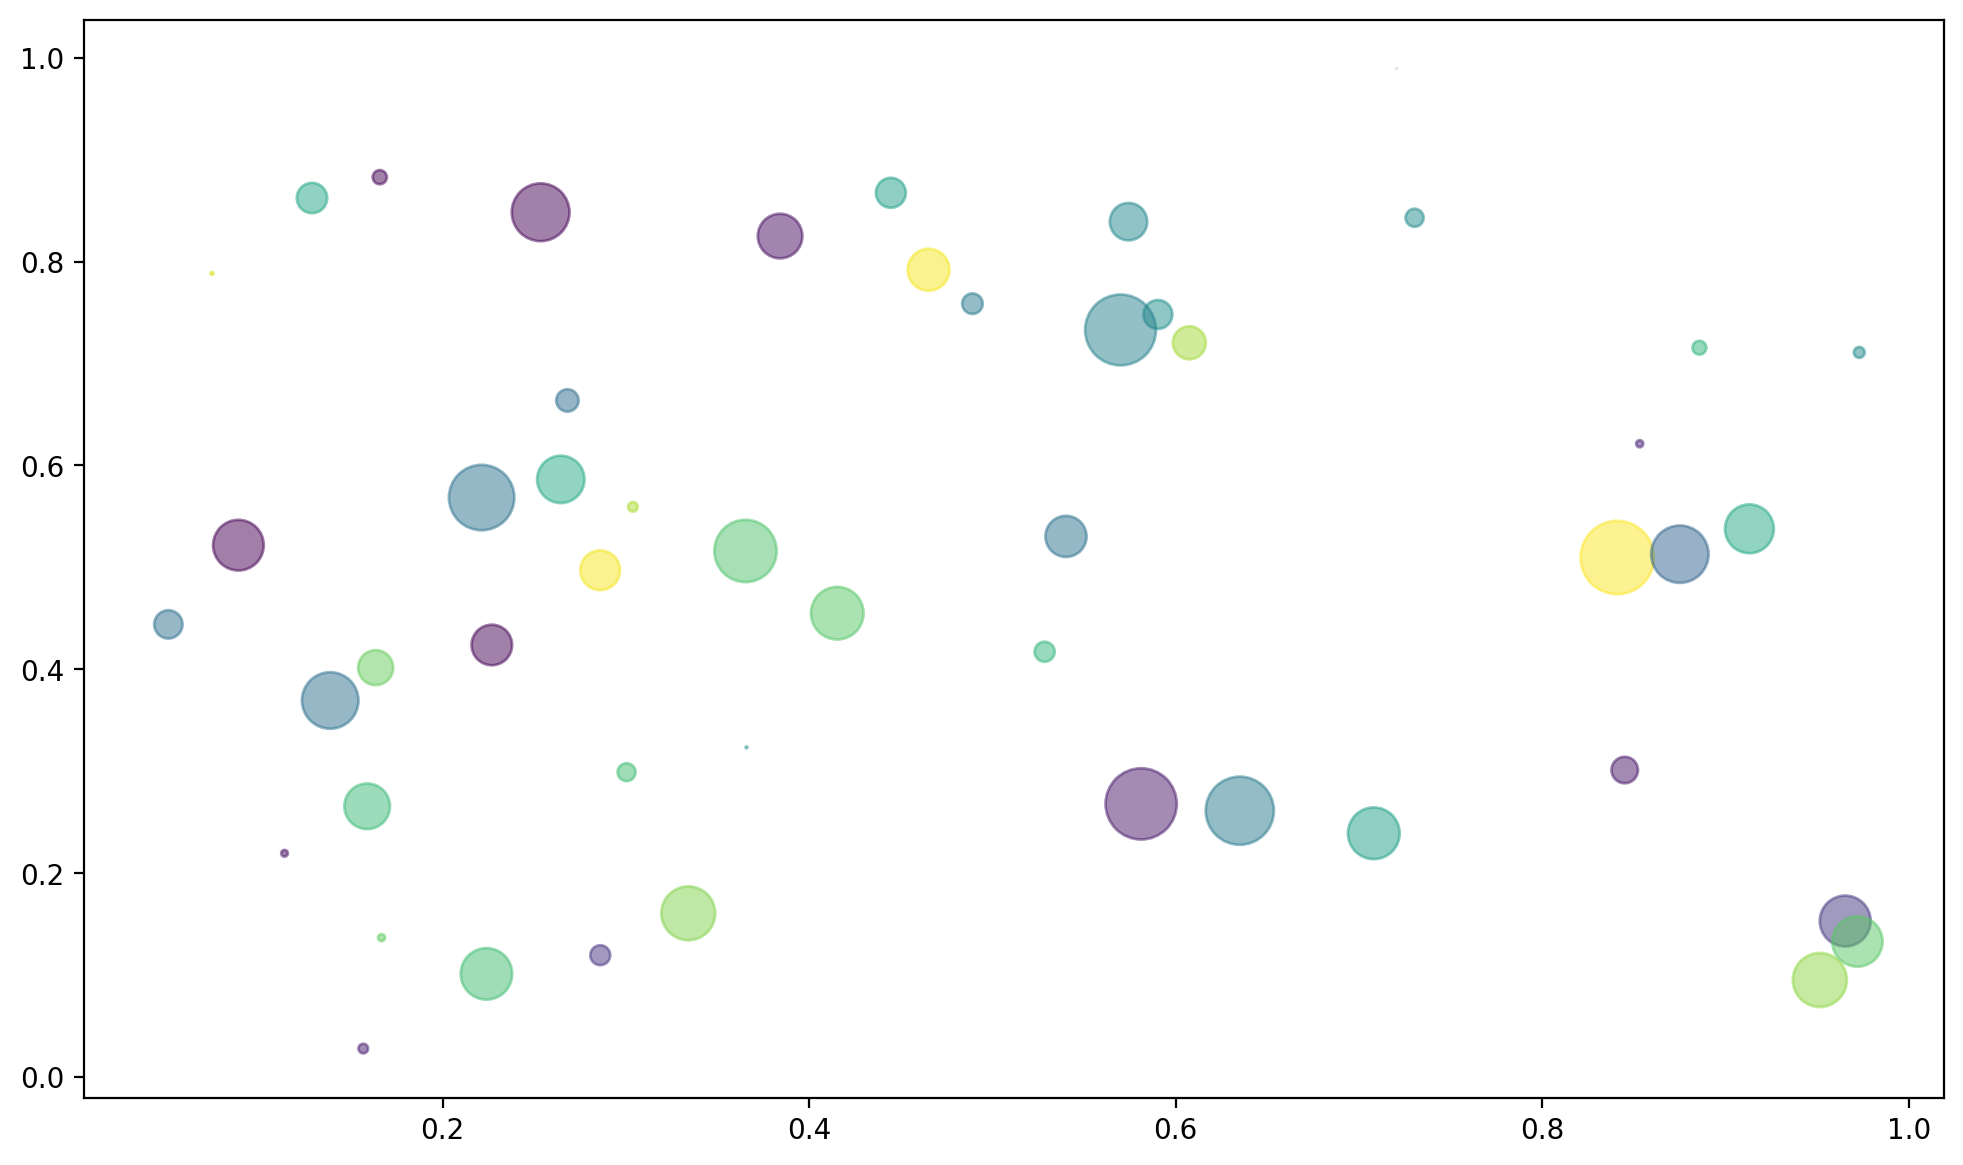

In [28]:
N = 50
x = np.random.uniform(size=N)
y = np.random.uniform(size=N)
colors = np.random.uniform(size=N)
area = np.pi * (15 * np.random.uniform(size=N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [29]:
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']        
colors = ["#9b59b6", "#3498db", "#2ecc71", "#e74c3c", "#34495e"]

test = np.stack((continent_names, colors), axis=-1)

print(test)

[['Africa' '#9b59b6']
 ['Americas' '#3498db']
 ['Asia' '#2ecc71']
 ['Europe' '#e74c3c']
 ['Oceania' '#34495e']]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 142

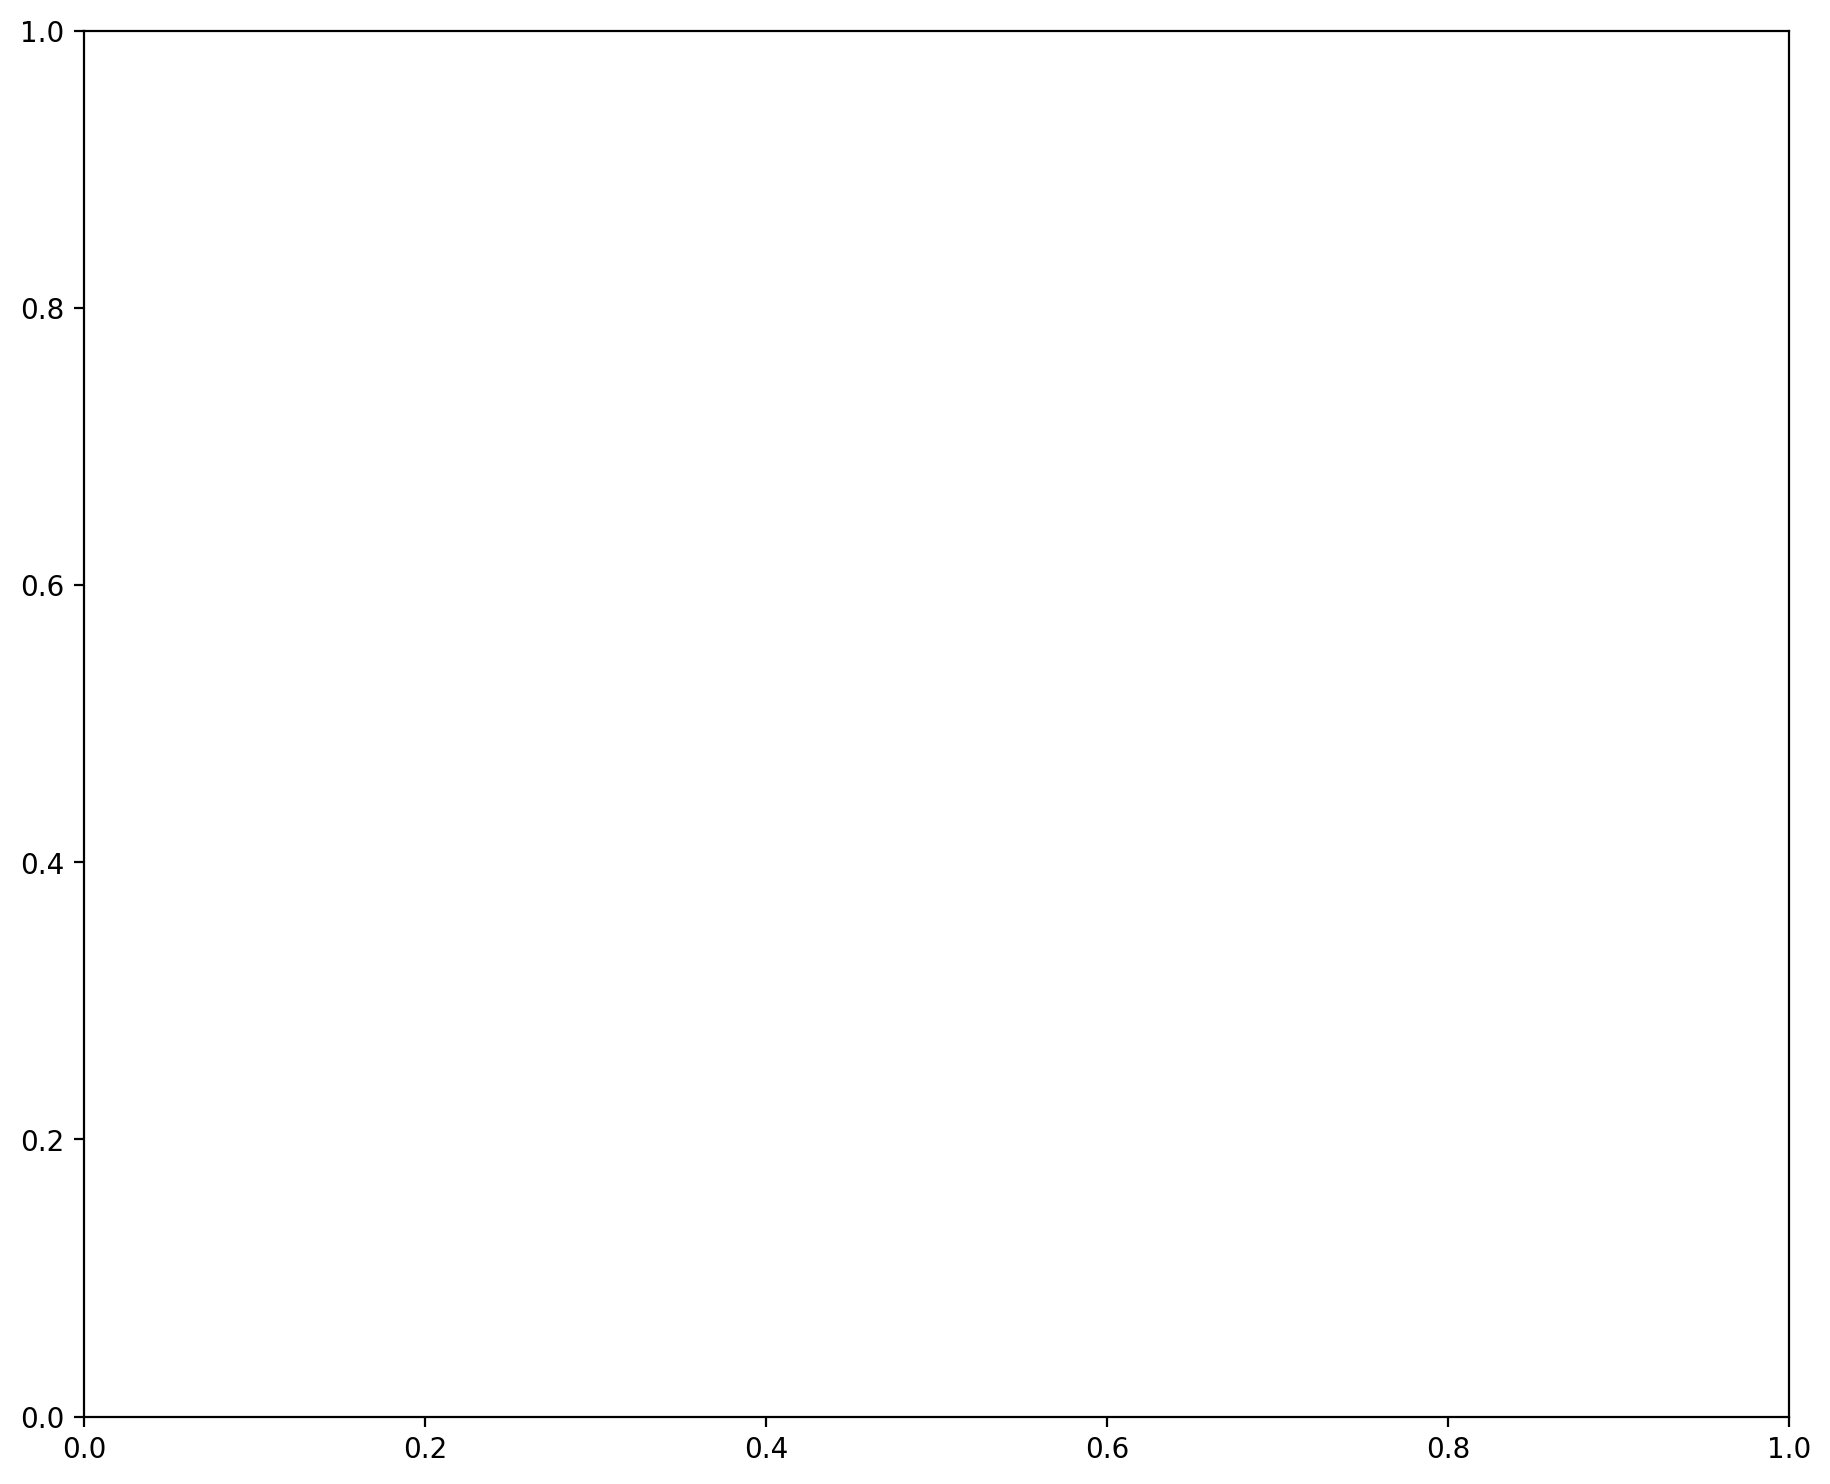

In [30]:
def plot_scatter(year):
    """
    Plot a scatter diagram of GDP vs life expectancy for a given year.
    """
    # get the data for this year
    population, continents, life_expectancy, GDP = get_data(year)

    # a list of continent names
    continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

    # a list of colors to go with each continent
    colors = ["#9b59b6", "#3498db", "#2ecc71", "#e74c3c", "#34495e"]

    # make a figure object
    fig,axes = plt.subplots(figsize=(11, 9))

    # we use a for loop to repeat the job of plotting each continent
    for continent_id in range(1, 6):
        # notice how I use the continent ID to select the color for this plot
        # continent_id will vary from 1-5, but the indices of the colors must go from 0-4!
        color = colors[continent_id - 1]
        
        new_population, new_life_exp, new_GDP = get_continent(continent_id, population, continents, life_expectancy, GDP)
        area = new_population/100000
        
        axes.scatter(new_GDP, new_life_exp, s=area, c=color, alpha=0.7, label=continent_names[continent_id - 1])
        #axes.set_xlim(0,40000)
        #axes.set_ylim(30,75)
        
        axes.set_xlabel("GDP")
        axes.set_ylabel("Life Expectancy [Years]")
        
        axes.set_xscale("log")
        
        lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
        for handle in lgnd.legend_handles:
            handle.set_sizes([40])

plot_scatter(1972)
plot_scatter(2007)

<section class="panel panel-warning"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Extra Credit (2 points)</h2>
</div>
</section>

> Extra credit questions allow you to make up for marks dropped in this and other homeworks. You can't score more than 100% overall, but if you get 2 extra credit points this week, and lose 2 points next week, you'd still be on course for 100% marks. I don't expect you to answer extra credit questions, *unless you want to*.

> The data you used for this tutorial was provided by [gapminder](http://gapminder.org), started by the inimitable Hans Rosling, who sadly died in 2017. The data was used in a famous [TED talk](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen?language=en), which showed animated versions of the above plots to make the case that life is getting better around the world.

> For extra credit this week, modify your ```plot_scatter``` function so that it takes a ```matplotlib``` ```Axis``` as an argument as well as the year, and plots on that axis. Use the new function to make a grid of subplots showing the data for all years present in the data (1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007).

In [145]:
def plot_scatter(year, axis):
    """
    Plot a scatter diagram of GDP vs life expectancy for a given year.
    """
    # get the data for this year
    population, continents, life_expectancy, GDP = get_data(year)

    # a list of continent names
    continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

    # a list of colors to go with each continent
    colors = ["#9b59b6", "#3498db", "#2ecc71", "#e74c3c", "#34495e"]

    # make a figure object

    # we use a for loop to repeat the job of plotting each continent
    for continent_id in range(1, 6):
        # notice how I use the continent ID to select the color for this plot
        # continent_id will vary from 1-5, but the indices of the colors must go from 0-4!
        color = colors[continent_id - 1]
        
        new_population, new_life_exp, new_GDP = get_continent(continent_id, population, continents, life_expectancy, GDP)
        area = new_population/100000
        
        axis.scatter(new_GDP, new_life_exp, s=area, c=color, alpha=0.7, label=continent_names[continent_id - 1])
        #axes.set_xlim(0,40000)
        #axes.set_ylim(30,75)
        
        axis.set_title(f"{year}")
        axis.set_xlabel("GDP")
        axis.set_ylabel("Life Expectancy [Years]")
        
        axis.set_xscale("log")
        
        lgnd = axis.legend(loc="lower right", scatterpoints=1, fontsize=10)
        for handle in lgnd.legend_handles:
            handle.set_sizes([40])

In [159]:
fig,axes = plt.subplots(figsize=(25, 40), nrows=12, ncols=1)
years = [1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]
axes = axes.ravel()

for i in range(len(years)):
    #for j in range(4):
     #   plot_scatter(years[i], axes[i,j])   
    plot_scatter(years[i], axes[i])
    